In [2]:
install.packages('car')
install.packages('dplyr')
install.packages('ggplot2')

library(car)
library(dplyr)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
data1 = read.csv('Data2014_3.csv')

In [4]:
colnames(data1) = c("Country", "Status", "Life.expectancy", "Adult.Mortality", "Infant.Deaths", "Alcohol", "percentage.expenditure" , "HepB" ,"Measles" , "BMI" , "under.five.deaths" , "Polio", "Total.expenditure" , "Diphtheria", "HIV.AIDS", "thinness.5.9.years", "Income.composition.of.resources", "Schooling", "Population", "GDP")
data1 = data1[-c(21)]
data1

Country,Status,Life.expectancy,Adult.Mortality,Infant.Deaths,Alcohol,percentage.expenditure,HepB,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,thinness.5.9.years,Income.composition.of.resources,Schooling,Population,GDP
<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Swaziland,Developing,58.4,382,2,0.01,574.3895,98,0,31.8,3,98,9.25,98,7.3,4.3,0.541,11.4,1095000,4.423000e+10
Turkey,Developing,75.5,17,16,1.45,181.9084,96,565,65.3,19,96,5.41,96,0.1,4.7,0.759,14.5,77229262,9.390000e+11
Antigua and Barbuda,Developing,76.2,131,0,8.56,2422.9998,99,0,47.0,0,96,5.54,99,0.2,3.3,0.782,13.9,92562,1.249733e+09
Bahamas,Developing,75.4,16,0,9.45,0.0000,96,0,63.8,0,96,7.74,96,0.1,2.5,0.789,12.6,370625,1.118000e+10
Bahrain,Developing,76.8,7,0,1.57,367.2557,98,46,62.9,0,98,4.98,98,0.1,6.0,0.820,14.5,1336073,3.338771e+10
Barbados,Developing,75.4,1,0,8.82,294.9057,94,0,53.7,0,95,7.47,94,0.1,3.7,0.793,15.3,284825,4.696344e+09
Bolivia (Plurinational State of),Developing,74.0,189,8,3.62,0.0000,98,0,51.9,10,99,6.33,98,0.1,1.1,0.666,13.8,10710000,3.300000e+10
Brunei Darussalam,Developing,77.6,8,0,0.01,269.1433,99,1,4.2,0,99,2.65,99,0.1,5.2,0.863,15.0,409778,1.709834e+10
CÃ´te d'Ivoire,Developing,52.8,47,58,0.01,0.0000,76,50,27.4,80,76,5.72,76,2.0,5.6,NA,NA,22647672,4.884000e+10


In [5]:
sample <- sample(c(TRUE, FALSE), nrow(data1), replace=TRUE, prob=c(0.9,0.1))
train  <- data1[sample, ]
test   <- data1[!sample, ]

In [6]:
nrow(train)

[1] 155

In [7]:
model1 = lm(Life.expectancy ~ . - Country, data = train)

In [8]:
summary(model1)


Call:
lm(formula = Life.expectancy ~ . - Country, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8728 -1.8304 -0.2903  1.3693  8.9364 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.191e+01  3.076e+00  16.874  < 2e-16 ***
StatusDeveloping                 2.209e-01  9.307e-01   0.237 0.812756    
Adult.Mortality                 -1.616e-02  4.252e-03  -3.802 0.000223 ***
Infant.Deaths                    5.757e-02  3.636e-02   1.583 0.115852    
Alcohol                          6.626e-03  8.469e-02   0.078 0.937765    
percentage.expenditure           2.671e-04  1.174e-04   2.276 0.024525 *  
HepB                            -2.979e-02  2.164e-02  -1.376 0.171179    
Measles                         -6.202e-05  5.027e-05  -1.234 0.219563    
BMI                             -1.272e-02  1.549e-02  -0.822 0.412825    
under.five.deaths               -4.663e-02  2.538e-02  -1.838 0.068463 .  
P

In [9]:
vif(model1)

Status                 Adult.Mortality 
                       2.002210                        3.345205 
                  Infant.Deaths                         Alcohol 
                     207.124569                        2.095923 
         percentage.expenditure                            HepB 
                       1.519505                        3.863067 
                        Measles                             BMI 
                       3.867739                        1.834768 
              under.five.deaths                           Polio 
                     172.365628                        2.993151 
              Total.expenditure                      Diphtheria 
                       1.209965                        6.125747 
                       HIV.AIDS              thinness.5.9.years 
                       2.229624                        2.443357 
Income.composition.of.resources                       Schooling 
                      10.582103                        8.044289 
                     Population                             GDP 
                      14.742421                        5.164893

In [10]:
model2 = lm(Life.expectancy ~ . - Country - Infant.Deaths - percentage.expenditure, data = train)
summary(model2)


Call:
lm(formula = Life.expectancy ~ . - Country - Infant.Deaths - 
    percentage.expenditure, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1324 -1.7995 -0.3082  1.2713  9.6982 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.158e+01  3.145e+00  16.403  < 2e-16 ***
StatusDeveloping                -4.456e-01  9.198e-01  -0.484 0.628900    
Adult.Mortality                 -1.646e-02  4.348e-03  -3.786 0.000234 ***
Alcohol                          1.887e-02  8.629e-02   0.219 0.827203    
HepB                            -2.270e-02  2.163e-02  -1.049 0.296092    
Measles                         -5.948e-05  5.135e-05  -1.158 0.248948    
BMI                             -1.218e-02  1.584e-02  -0.769 0.443320    
under.five.deaths               -6.436e-03  3.747e-03  -1.718 0.088299 .  
Polio                           -3.403e-03  1.984e-02  -0.171 0.864130    
Total.expenditure             

In [11]:
vif(model2)

Status                 Adult.Mortality 
                       1.868376                        3.342190 
                        Alcohol                            HepB 
                       2.078596                        3.686852 
                        Measles                             BMI 
                       3.855910                        1.833150 
              under.five.deaths                           Polio 
                       3.590905                        2.988922 
              Total.expenditure                      Diphtheria 
                       1.207193                        5.889321 
                       HIV.AIDS              thinness.5.9.years 
                       2.192399                        2.395258 
Income.composition.of.resources                       Schooling 
                      10.172991                        7.988708 
                     Population                             GDP 
                      10.580817                        4.125711

In [12]:
model3 = lm(Life.expectancy ~ . - Country - Infant.Deaths - percentage.expenditure - 
            Income.composition.of.resources, data = train)
summary(model3)


Call:
lm(formula = Life.expectancy ~ . - Country - Infant.Deaths - 
    percentage.expenditure - Income.composition.of.resources, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9304 -2.1234  0.2888  2.0235  9.8370 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.969e+01  3.510e+00  17.007  < 2e-16 ***
StatusDeveloping   -9.013e-01  1.093e+00  -0.825 0.410935    
Adult.Mortality    -2.557e-02  4.965e-03  -5.149 9.54e-07 ***
Alcohol             7.271e-02  1.024e-01   0.710 0.478756    
HepB               -3.173e-02  2.571e-02  -1.234 0.219456    
Measles            -2.523e-05  6.089e-05  -0.414 0.679320    
BMI                 1.519e-02  1.833e-02   0.828 0.409002    
under.five.deaths  -3.554e-03  4.437e-03  -0.801 0.424611    
Polio              -1.501e-02  2.355e-02  -0.638 0.524926    
Total.expenditure   1.967e-01  1.113e-01   1.768 0.079470 .  
Diphtheria          5.274e-02  3.393e-02   1.554 0.122591  

In [13]:
vif(model3)

Status    Adult.Mortality            Alcohol               HepB 
          1.860012           3.075095           2.063837           3.675127 
           Measles                BMI  under.five.deaths              Polio 
          3.824633           1.733332           3.552166           2.970260 
 Total.expenditure         Diphtheria           HIV.AIDS thinness.5.9.years 
          1.198961           5.776989           2.133860           2.395193 
         Schooling         Population                GDP 
          3.145900          10.283352           3.953101

In [14]:
model4 = lm(Life.expectancy ~ . - Country - Infant.Deaths - percentage.expenditure - 
            Income.composition.of.resources - Measles , data = train)
summary(model4)
#removed Measles because of high corr with Population


Call:
lm(formula = Life.expectancy ~ . - Country - Infant.Deaths - 
    percentage.expenditure - Income.composition.of.resources - 
    Measles, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1190  -2.1100   0.1679   1.9785   9.8428 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.980e+01  3.489e+00  17.138  < 2e-16 ***
StatusDeveloping   -9.186e-01  1.088e+00  -0.844 0.400188    
Adult.Mortality    -2.579e-02  4.921e-03  -5.240 6.30e-07 ***
Alcohol             6.679e-02  1.010e-01   0.661 0.509744    
HepB               -3.211e-02  2.561e-02  -1.253 0.212288    
BMI                 1.559e-02  1.825e-02   0.855 0.394370    
under.five.deaths  -3.582e-03  4.422e-03  -0.810 0.419418    
Polio              -1.506e-02  2.348e-02  -0.641 0.522379    
Total.expenditure   1.947e-01  1.108e-01   1.757 0.081309 .  
Diphtheria          5.318e-02  3.381e-02   1.573 0.118154    
HIV.AIDS           -1.135e+00  2.998e-0

In [15]:
vif(model4)

Status    Adult.Mortality            Alcohol               HepB 
          1.857300           3.039631           2.023557           3.670500 
               BMI  under.five.deaths              Polio  Total.expenditure 
          1.728335           3.551336           2.970200           1.196634 
        Diphtheria           HIV.AIDS thinness.5.9.years          Schooling 
          5.771294           2.115003           2.386799           3.138905 
        Population                GDP 
          6.666344           3.729608

[1] 1.340074e-16

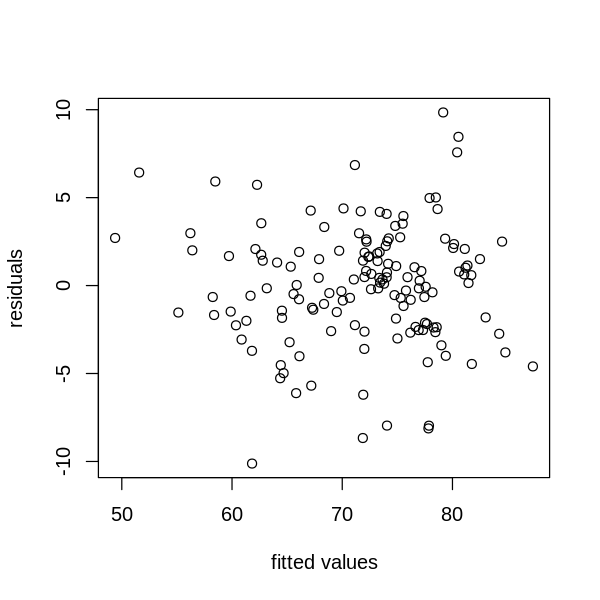

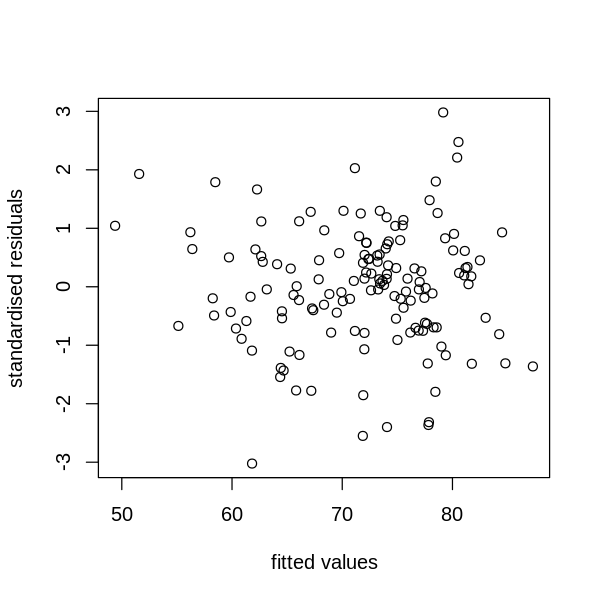

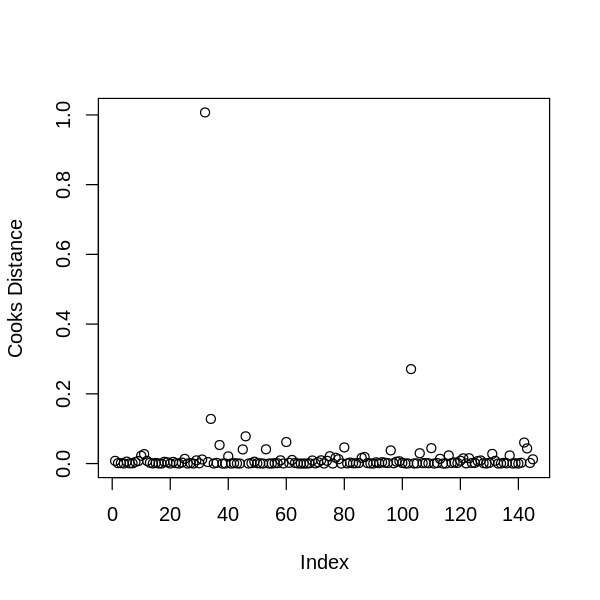

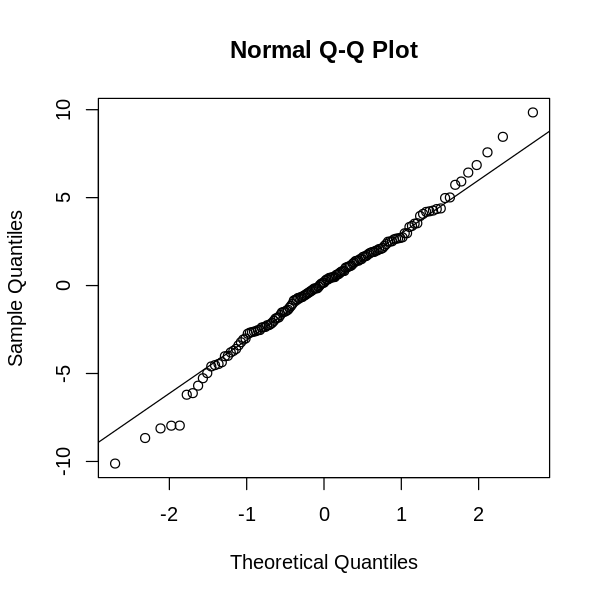

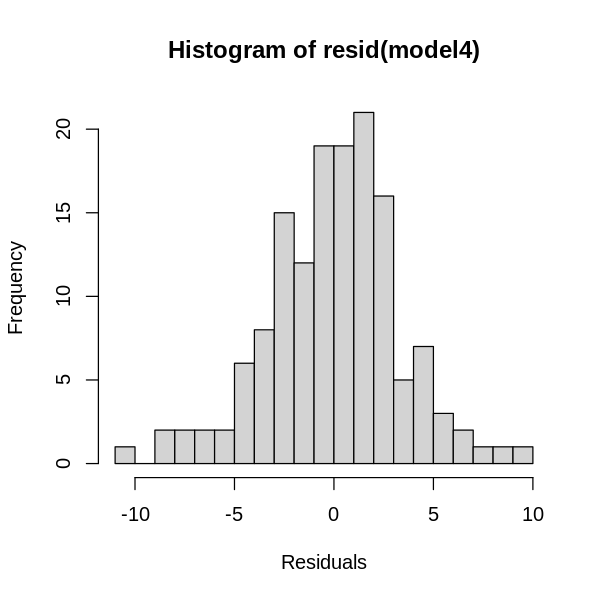

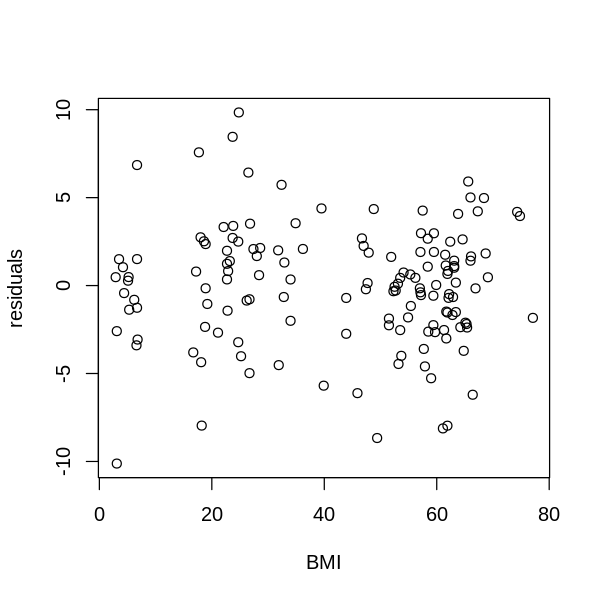

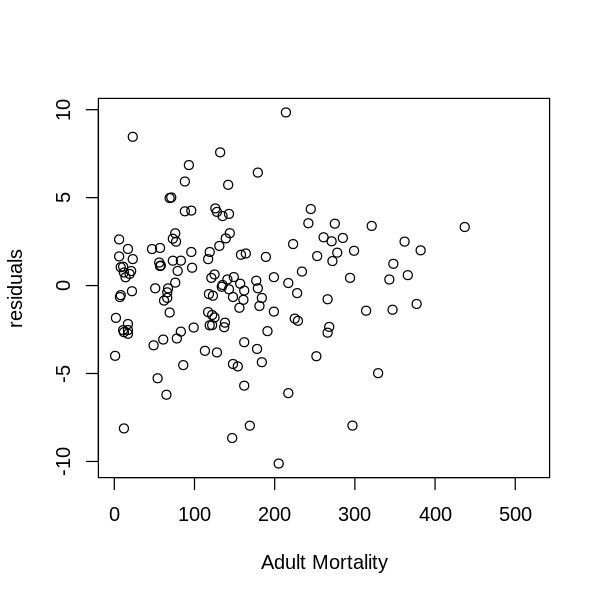

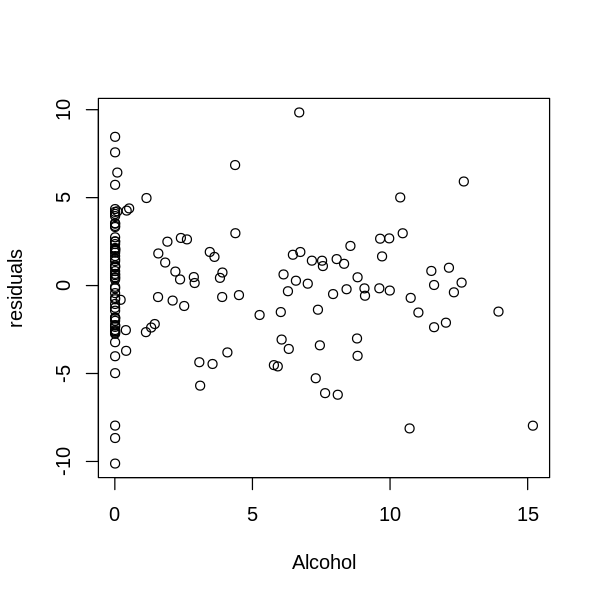

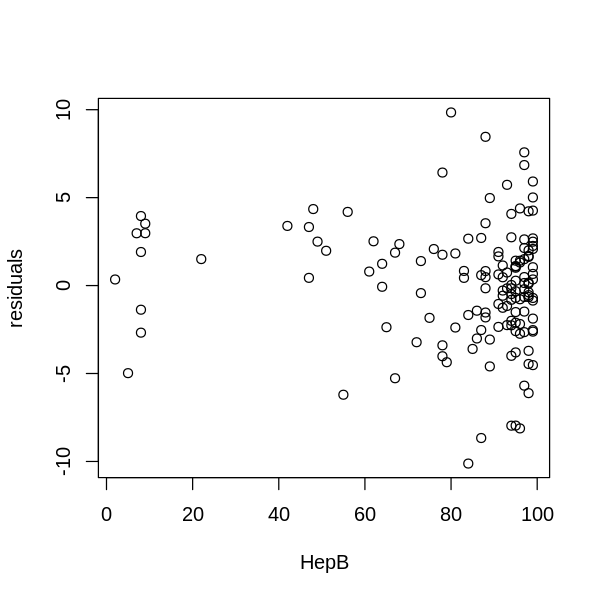

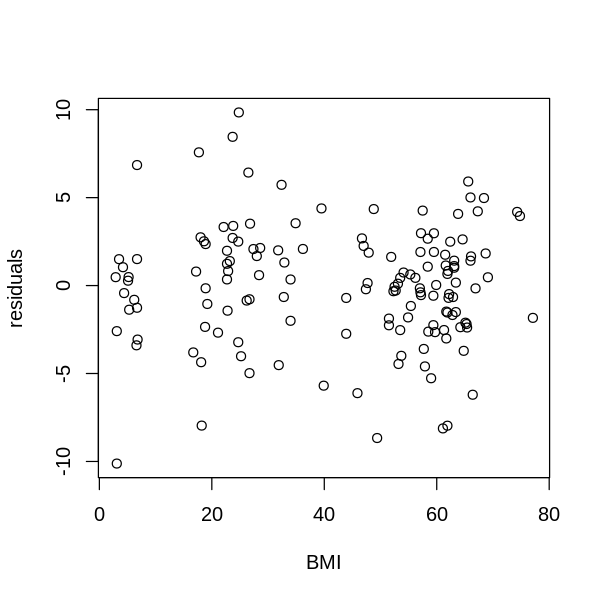

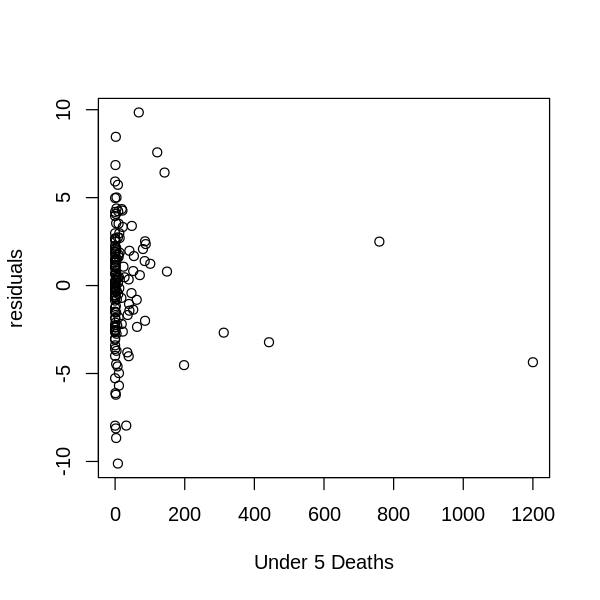

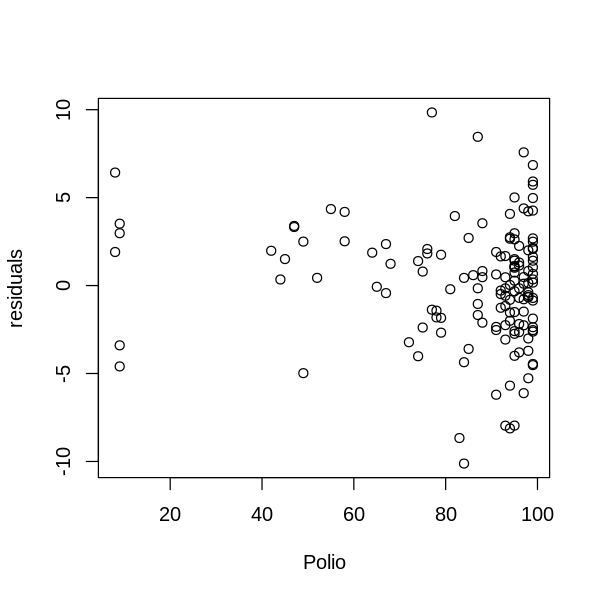

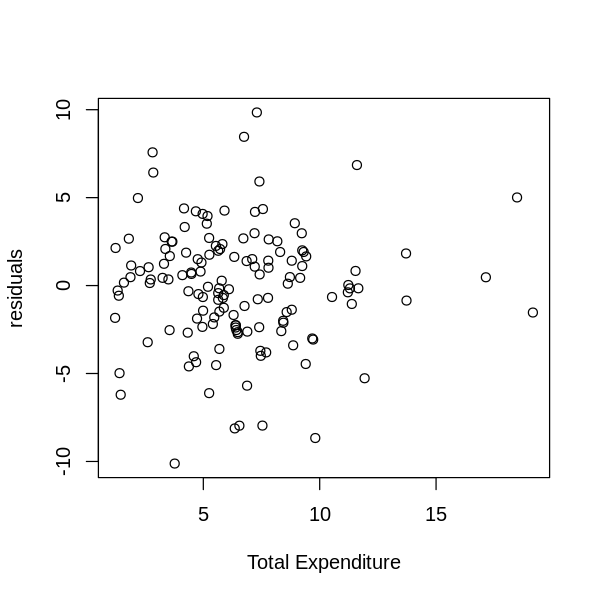

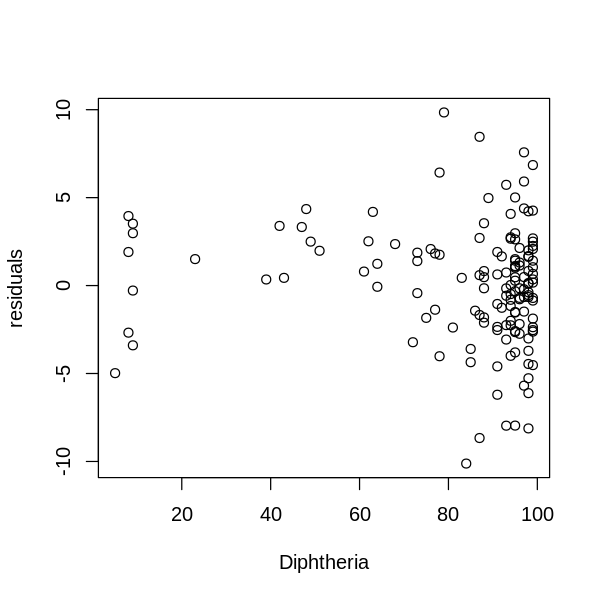

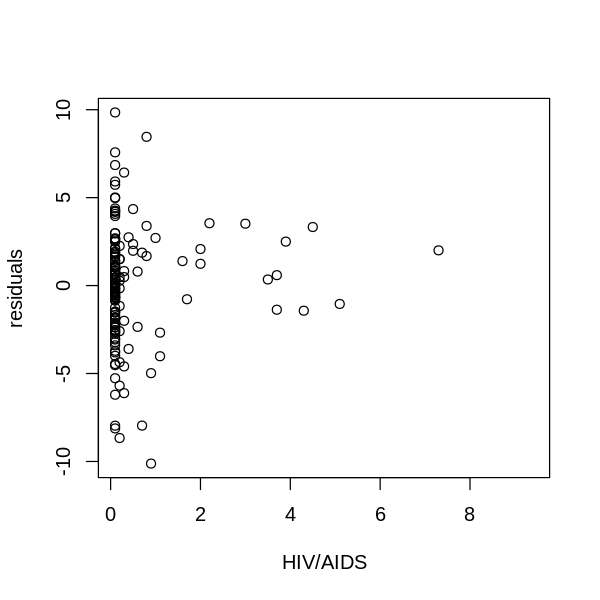

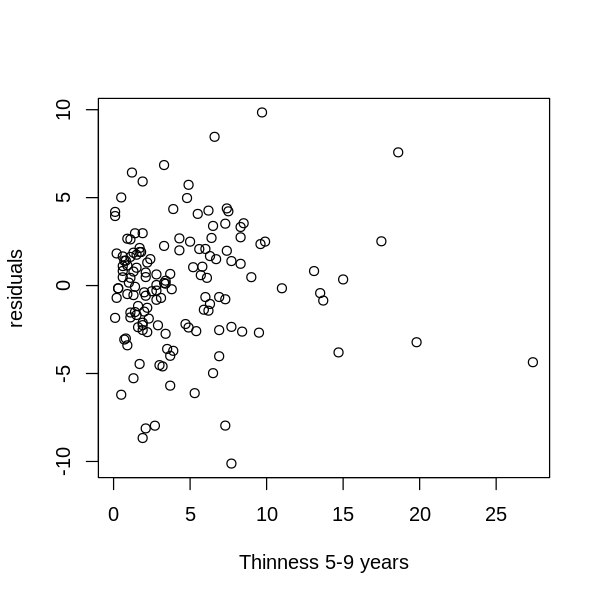

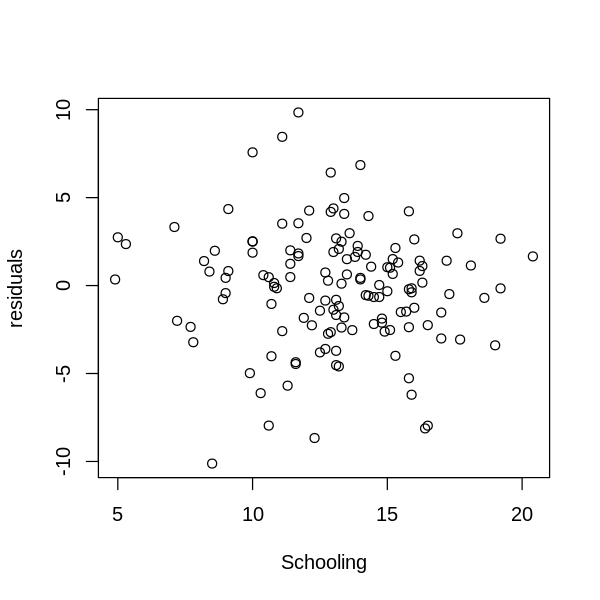

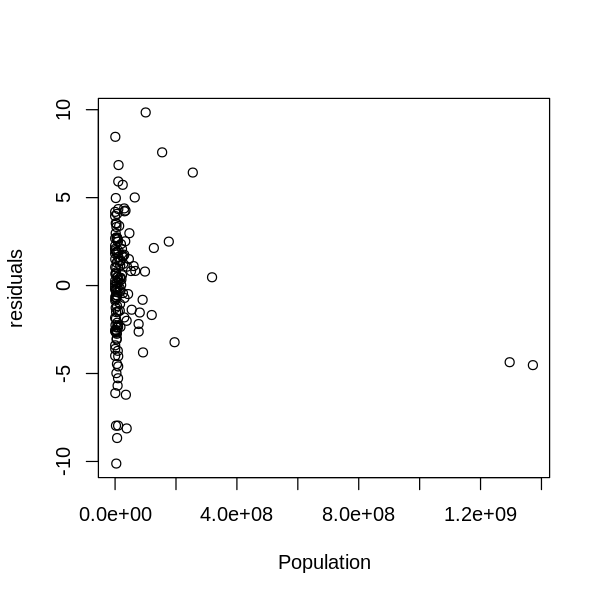

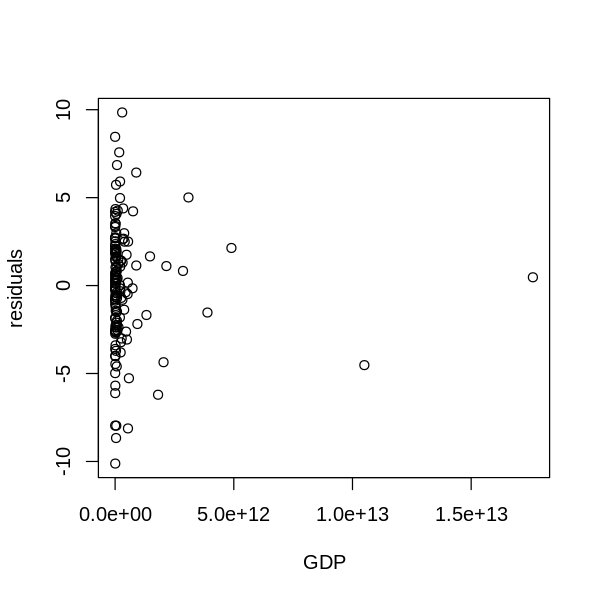

In [19]:
options(repr.plot.width = 5, repr.plot.height = 5)

mean(resid(model4))
plot(fitted(model4), resid(model4), xlab = 'fitted values', ylab = 'residuals')
plot(fitted(model4), rstandard(model4), xlab = 'fitted values', ylab = 'standardised residuals')
plot(cooks.distance(model4), ylab = 'Cooks Distance')
qqnorm(resid(model4))
qqline(resid(model4))
#'Country' 'Status' 'Life.expectancy' 'Adult.Mortality' 'Alcohol' 'HepB' 'BMI' 'under.five.deaths' 
#'Polio' 'Total.expenditure' 'Diphtheria' 'HIV.AIDS' 'thinness.5.9.years' 'Schooling' 'Population' 'GDP'
hist(resid(model4),breaks=20, xlab = 'Residuals')
plot(train$BMI[!is.na(train$BMI)], model4$residuals[!is.na(train$BMI)], xlab = 'BMI', ylab = 'residuals')
#plot(train$Status[!is.na(train$Status)], model4$residuals[!is.na(train$Status)], xlab = 'Status', ylab = 'residuals')
plot(train$Adult.Mortality[!is.na(train$Adult.Mortality)], model4$residuals[!is.na(train$Adult.Mortality)], xlab = 'Adult Mortality', ylab = 'residuals')
plot(train$Alcohol[!is.na(train$Alcohol)], model4$residuals[!is.na(train$Alcohol)], xlab = 'Alcohol', ylab = 'residuals')
plot(train$HepB[!is.na(train$HepB)], model4$residuals[!is.na(train$HepB)], xlab = 'HepB', ylab = 'residuals')
plot(train$BMI[!is.na(train$BMI)], model4$residuals[!is.na(train$BMI)], xlab = 'BMI', ylab = 'residuals')
plot(train$under.five.deaths[!is.na(train$under.five.deaths)], model4$residuals[!is.na(train$under.five.deaths)], xlab = 'Under 5 Deaths', ylab = 'residuals')
plot(train$Polio[!is.na(train$Polio)], model4$residuals[!is.na(train$Polio)], xlab = 'Polio', ylab = 'residuals')
plot(train$Total.expenditure[!is.na(train$Total.expenditure)], model4$residuals[!is.na(train$Total.expenditure)], xlab = 'Total Expenditure', ylab = 'residuals')
plot(train$Diphtheria[!is.na(train$Diphtheria)], model4$residuals[!is.na(train$Diphtheria)], xlab = 'Diphtheria', ylab = 'residuals')
plot(train$HIV.AIDS[!is.na(train$HIV.AIDS)], model4$residuals[!is.na(train$HIV.AIDS)], xlab = 'HIV/AIDS', ylab = 'residuals')
plot(train$thinness.5.9.years[!is.na(train$thinness.5.9.years)], model4$residuals[!is.na(train$thinness.5.9.years)], xlab = 'Thinness 5-9 years', ylab = 'residuals')
plot(train$Schooling[!is.na(train$Schooling)], model4$residuals[!is.na(train$Schooling)], xlab = 'Schooling', ylab = 'residuals')
plot(train$Population[!is.na(train$Population)], model4$residuals[!is.na(train$Population)], xlab = 'Population', ylab = 'residuals')
plot(train$GDP[!is.na(train$GDP)], model4$residuals[!is.na(train$GDP)], xlab = 'GDP', ylab = 'residuals')

In [20]:
options(repr.plot.width = 6, repr.plot.height = 6)

train[cooks.distance(model4)>4/183,]
outs = as.numeric(names(cooks.distance(model4))[(cooks.distance(model4) > (4/nrow(train)))])
train_wo_outs  = train[-outs, ]

,Country,Status,Life.expectancy,Adult.Mortality,Infant.Deaths,Alcohol,percentage.expenditure,HepB,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,thinness.5.9.years,Income.composition.of.resources,Schooling,Population,GDP
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
11,Cuba,Developing,79.0,93,1,4.37,13.669102,97,0,6.7,1,99,11.60,99,0.1,3.3,0.772,14.0,11306909,8.065600e+10
12,Czechia,Developed,78.6,88,0,12.68,0.000000,99,222,65.6,0,99,7.41,97,0.1,1.9,NA,NA,10525347,2.090000e+11
36,The former Yugoslav republic of Macedonia,Developing,75.5,12,0,1.13,0.000000,97,116,59.7,0,96,6.48,95,0.1,2.2,0.743,12.9,2067471,1.136227e+10
38,United Kingdom of Great Britain and Northern Ireland,Developed,81.0,71,3,10.37,0.000000,99,133,66.0,4,95,18.48,95,0.1,0.5,NA,NA,64602298,3.090000e+12
42,Viet Nam,Developing,75.9,128,28,4.09,0.000000,95,15033,16.7,35,96,7.70,95,0.1,14.7,0.675,12.5,91713850,2.330000e+11
51,Germany,Developed,81.0,69,2,11.03,941.756291,88,443,61.9,3,94,19.16,95,0.1,1.1,0.920,17.0,80982500,3.890000e+12
52,Philippines,Developing,68.4,214,54,6.70,31.272322,80,58848,24.8,68,77,7.30,79,0.1,9.7,0.676,11.7,100513137,2.970000e+11
61,Nigeria,Developing,53.6,362,490,0.01,263.211103,49,6855,24.7,759,49,3.67,49,3.9,9.9,0.521,10.0,176404931,5.470000e+11
69,Mauritania,Developing,63.0,205,8,0.01,80.926798,84,14,3.1,8,84,3.77,84,0.9,7.7,0.509,8.5,3930894,6.592538e+09


In [21]:
model4_wo_out = lm(Life.expectancy ~ . - Country - Infant.Deaths - percentage.expenditure - 
            Income.composition.of.resources - Measles, data = train_wo_outs)
summary(model4_wo_out)


Call:
lm(formula = Life.expectancy ~ . - Country - Infant.Deaths - 
    percentage.expenditure - Income.composition.of.resources - 
    Measles, data = train_wo_outs)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6008  -1.7036   0.1964   1.9344   9.5143 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.829e+01  3.596e+00  16.210  < 2e-16 ***
StatusDeveloping   -1.204e+00  1.208e+00  -0.997 0.321058    
Adult.Mortality    -2.440e-02  4.995e-03  -4.884 3.33e-06 ***
Alcohol             1.067e-01  1.084e-01   0.984 0.327194    
HepB               -1.194e-02  3.258e-02  -0.366 0.714663    
BMI                 2.336e-02  1.851e-02   1.262 0.209531    
under.five.deaths  -1.923e-03  4.678e-03  -0.411 0.681696    
Polio              -2.262e-02  2.798e-02  -0.809 0.420437    
Total.expenditure   2.820e-01  1.268e-01   2.224 0.028085 *  
Diphtheria          3.548e-02  4.091e-02   0.867 0.387669    
HIV.AIDS           -1.217e+00  

In [22]:
vif(model4_wo_out)

Status    Adult.Mortality            Alcohol               HepB 
          1.772207           2.969547           1.896618           5.372915 
               BMI  under.five.deaths              Polio  Total.expenditure 
          1.667951           3.993778           3.783046           1.211679 
        Diphtheria           HIV.AIDS thinness.5.9.years          Schooling 
          8.327036           2.196725           2.497823           2.846301 
        Population                GDP 
          8.973075           5.053837

[1] 5.054846e-17

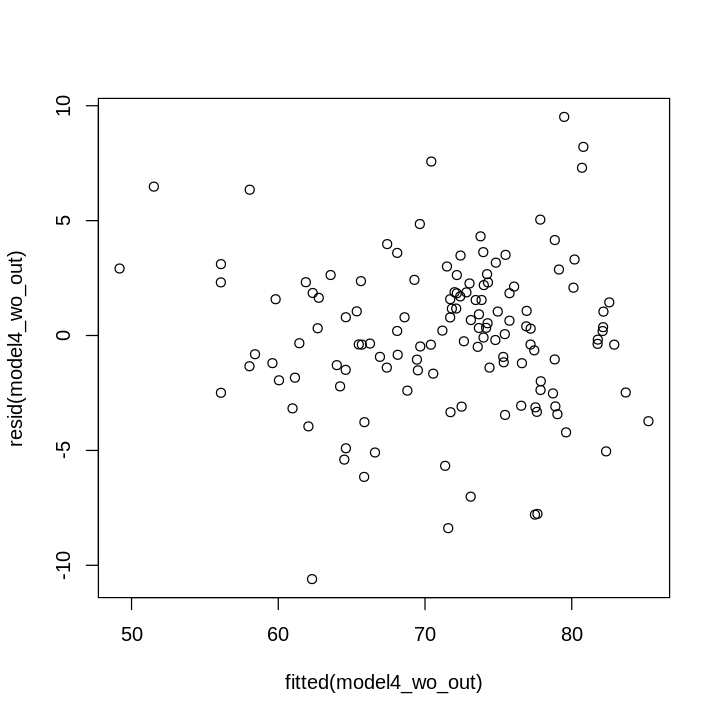

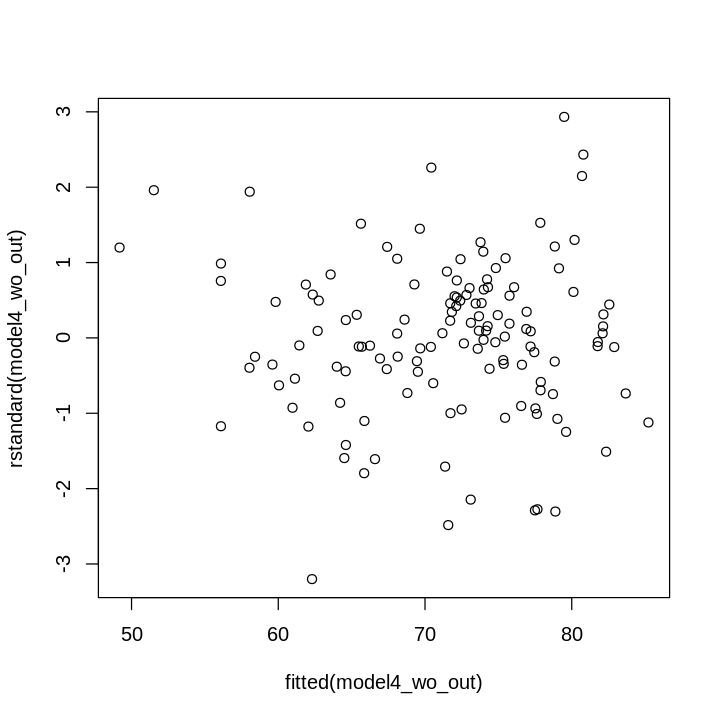

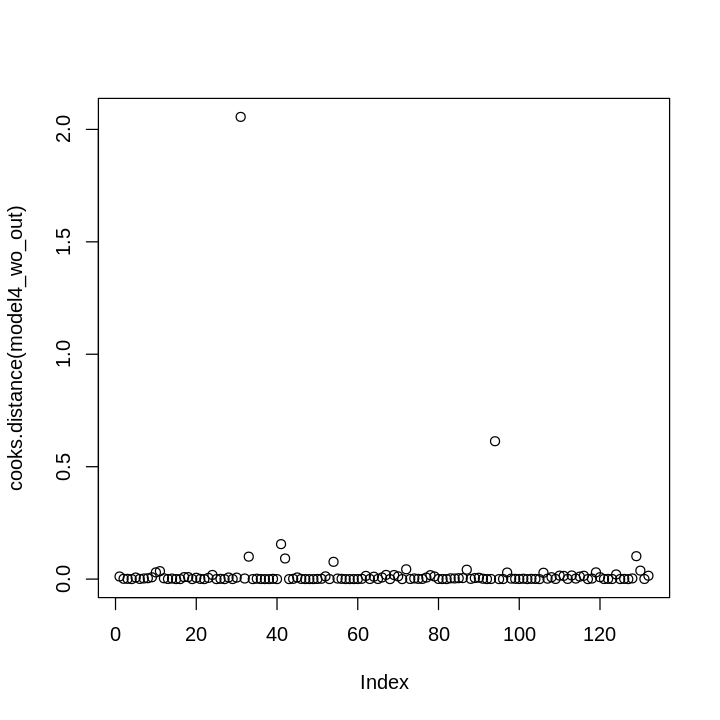

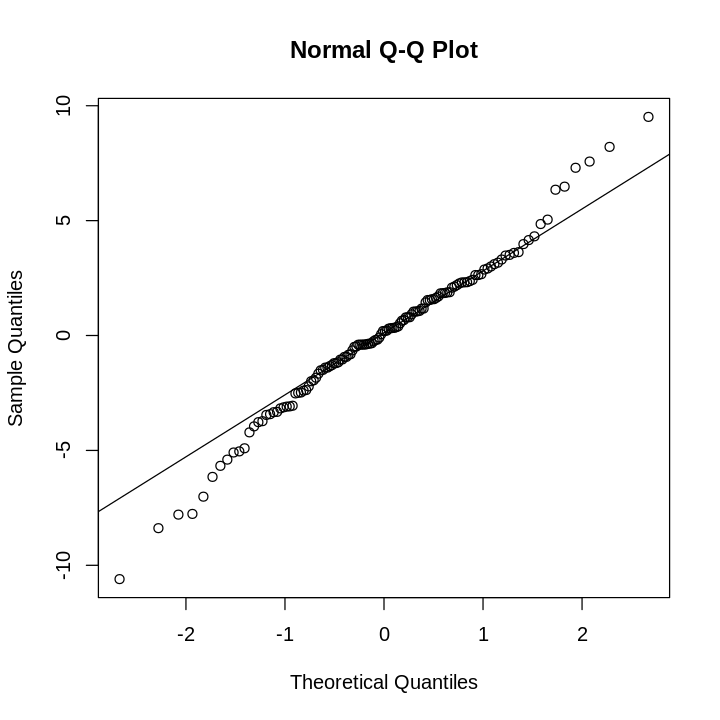

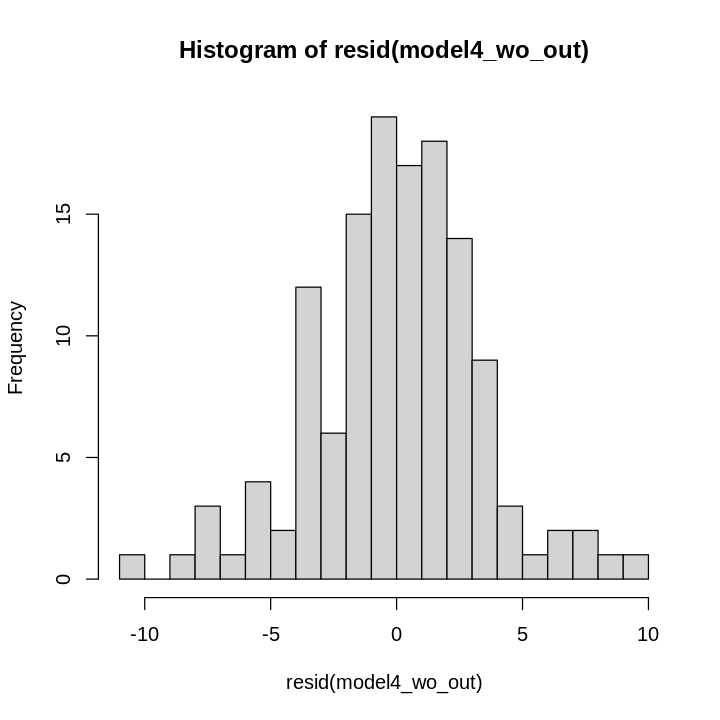

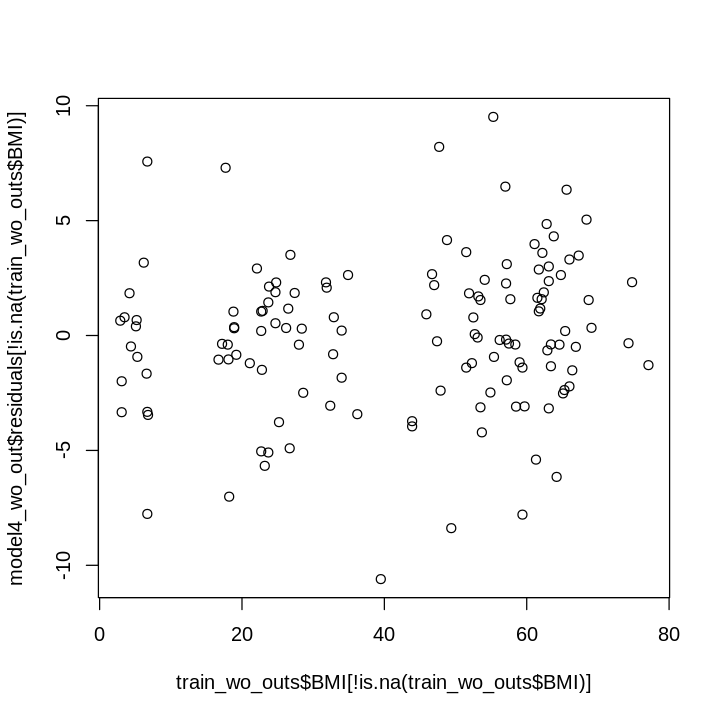

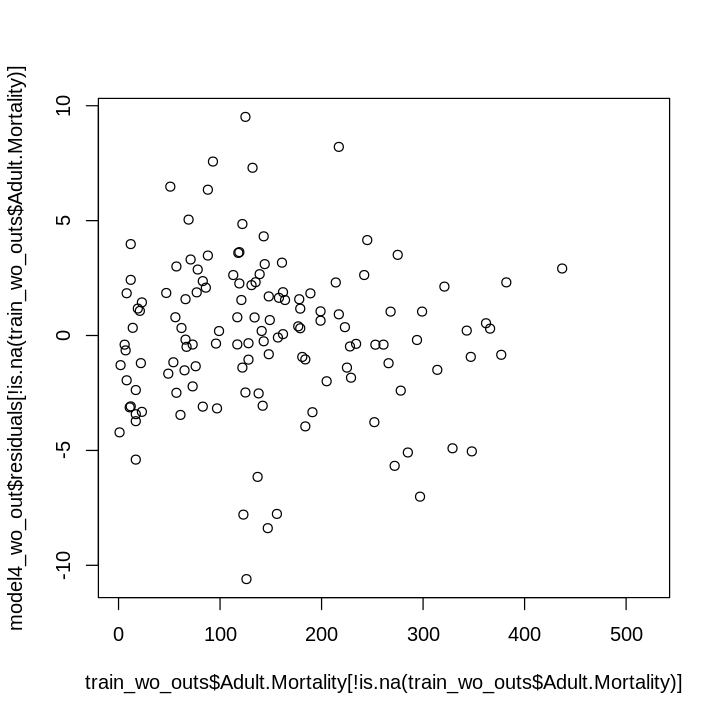

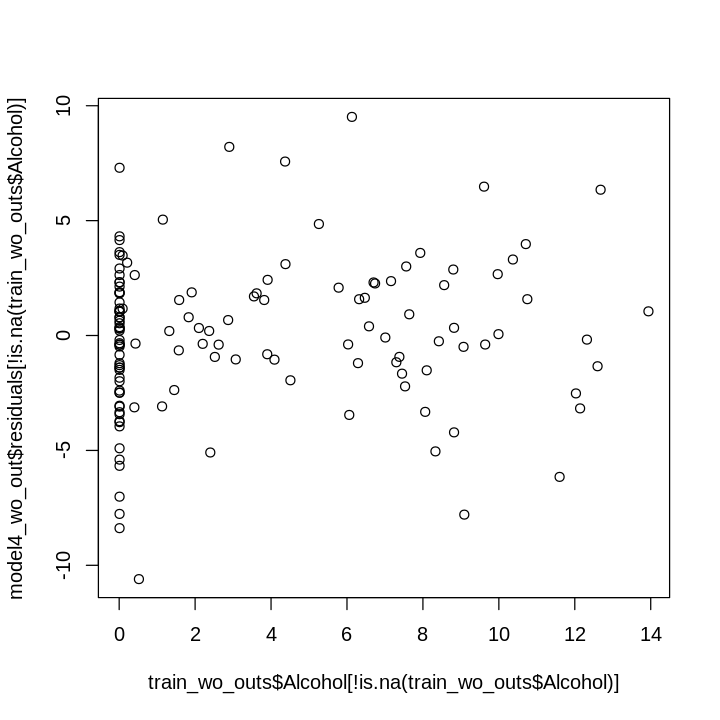

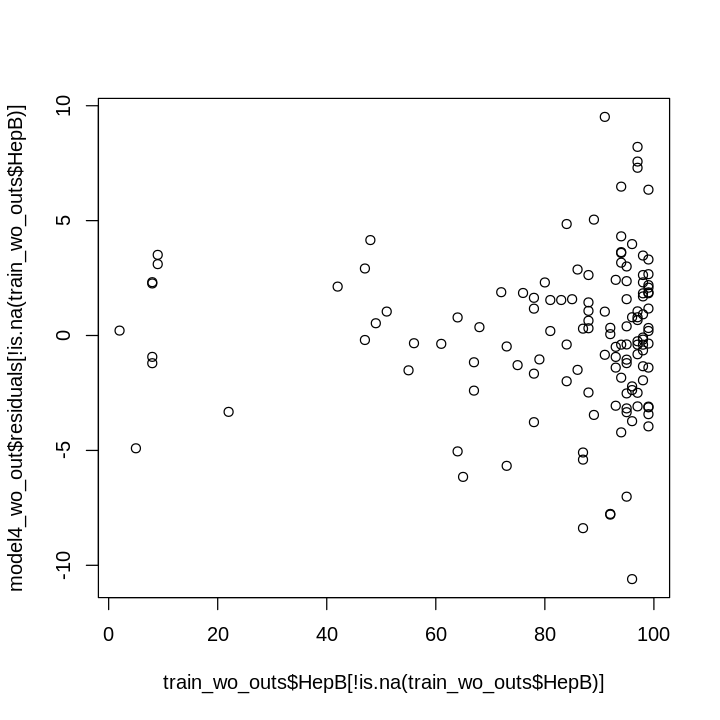

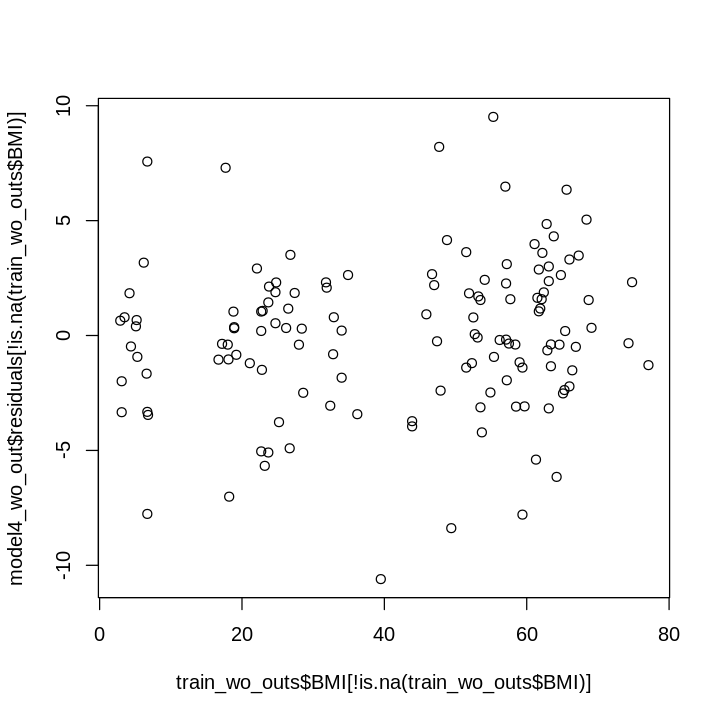

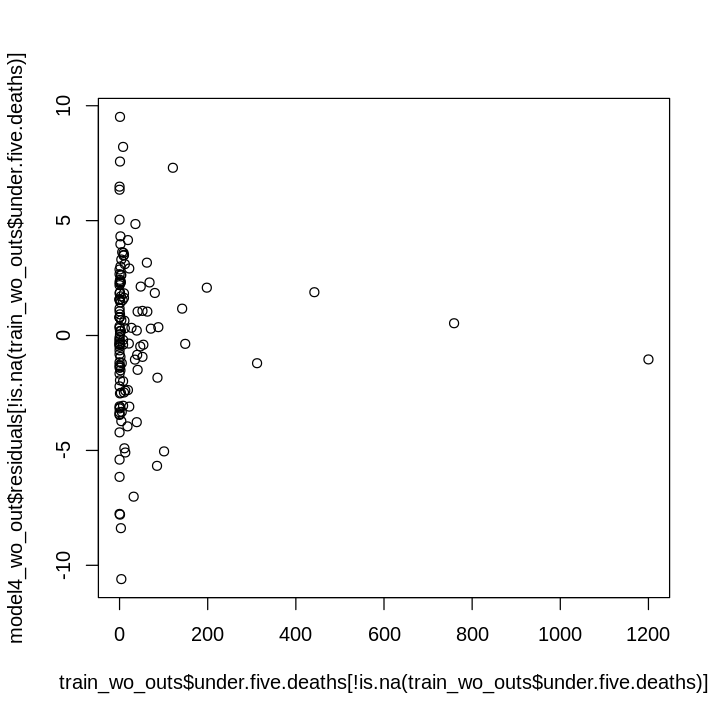

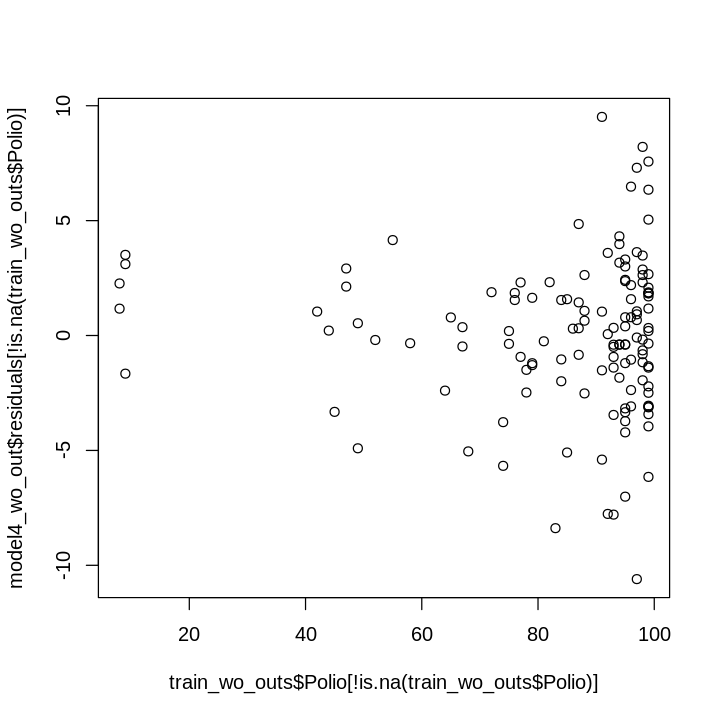

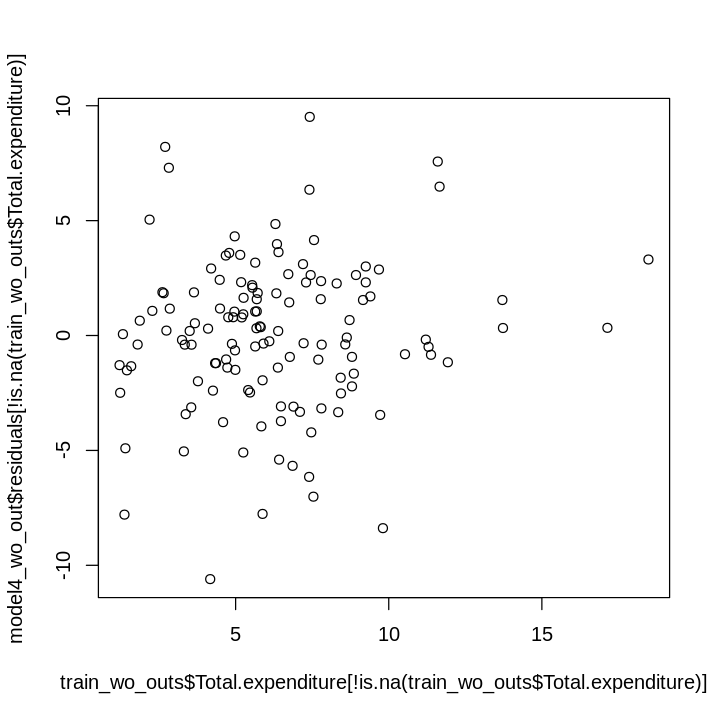

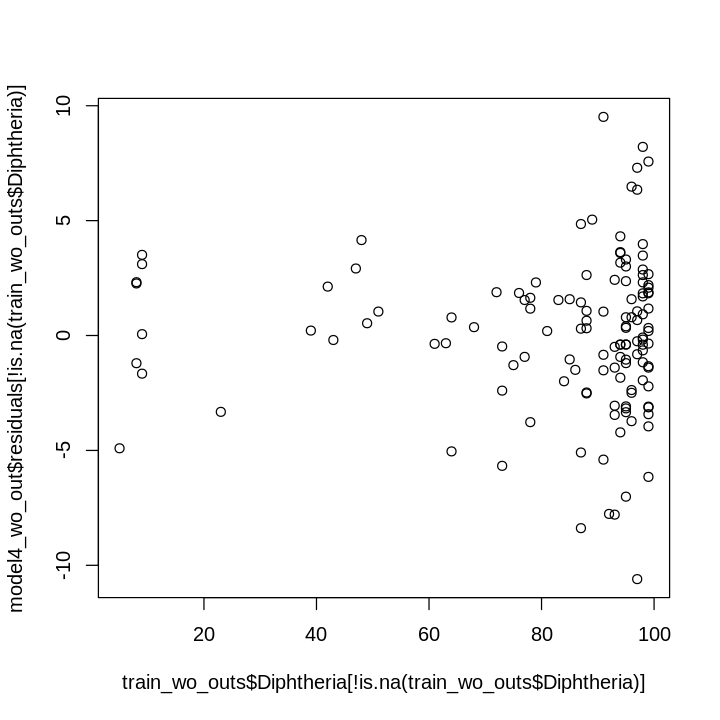

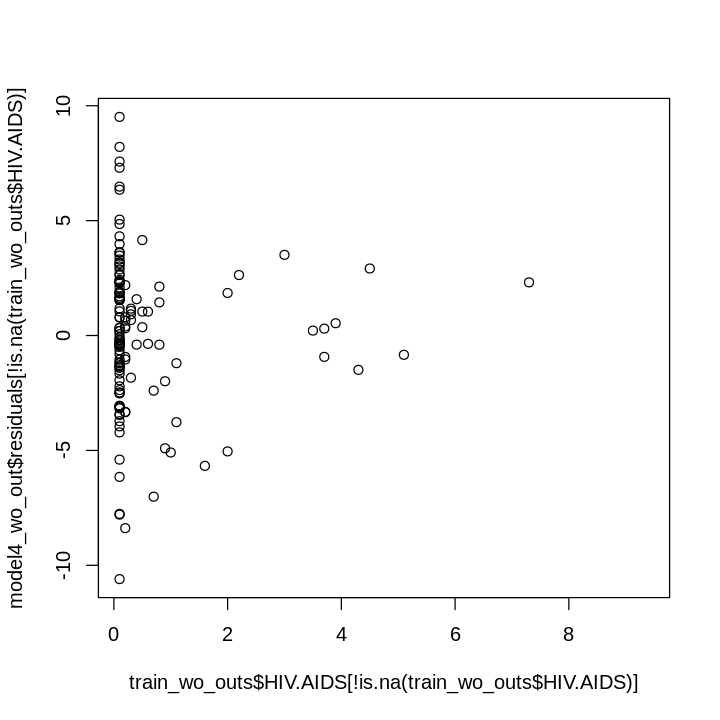

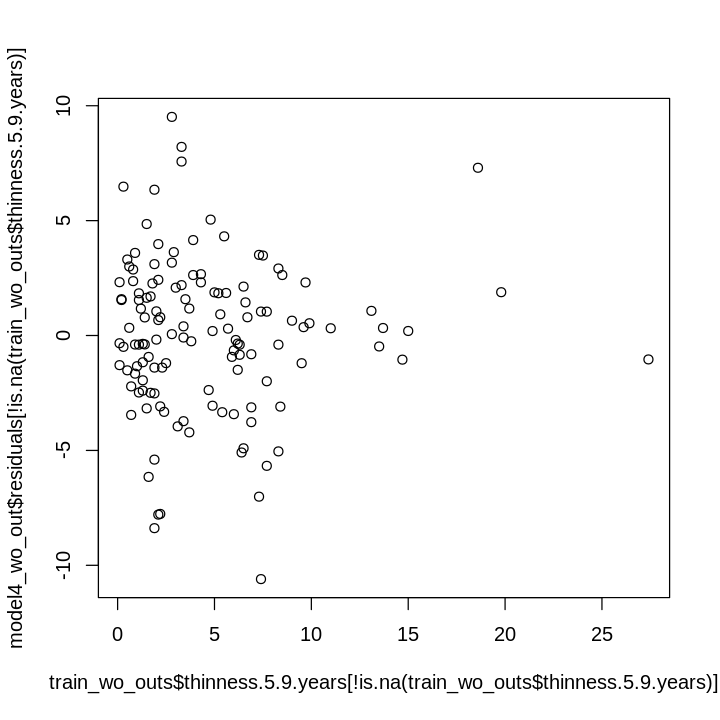

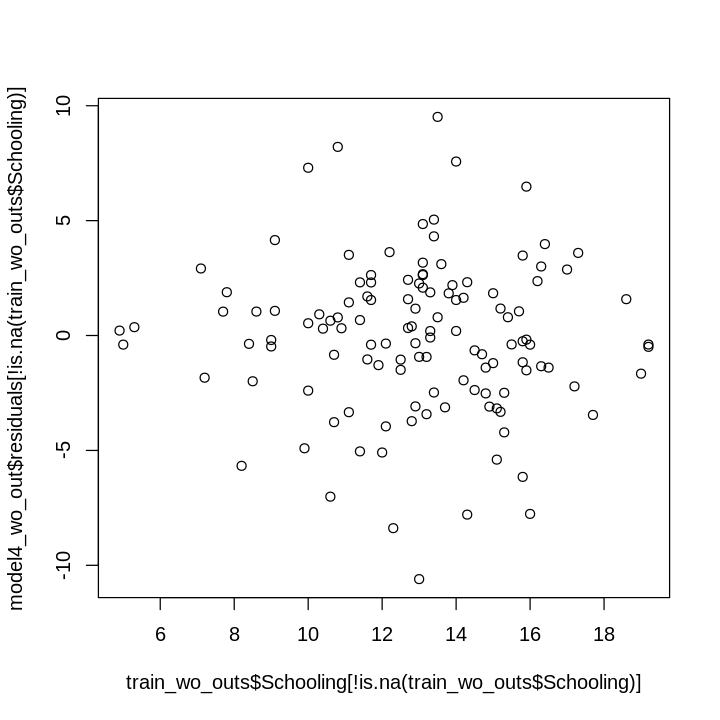

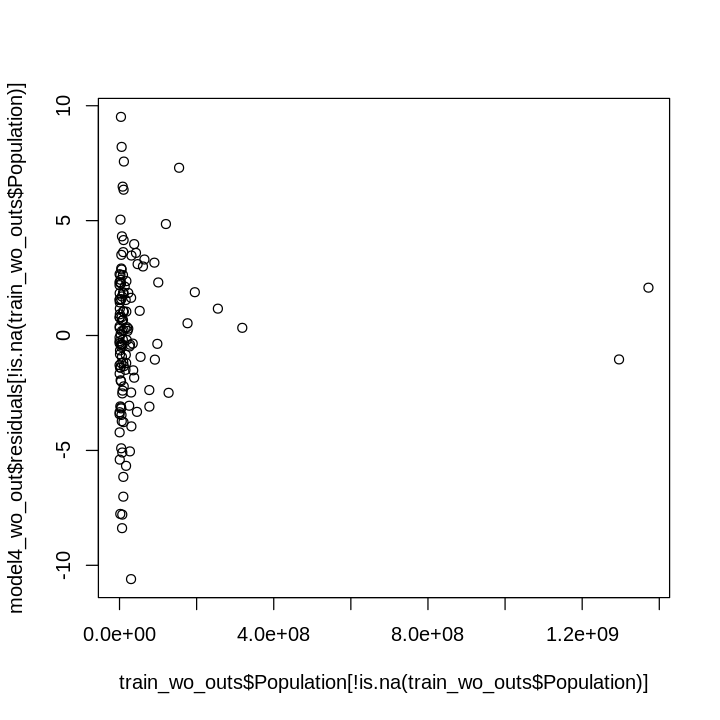

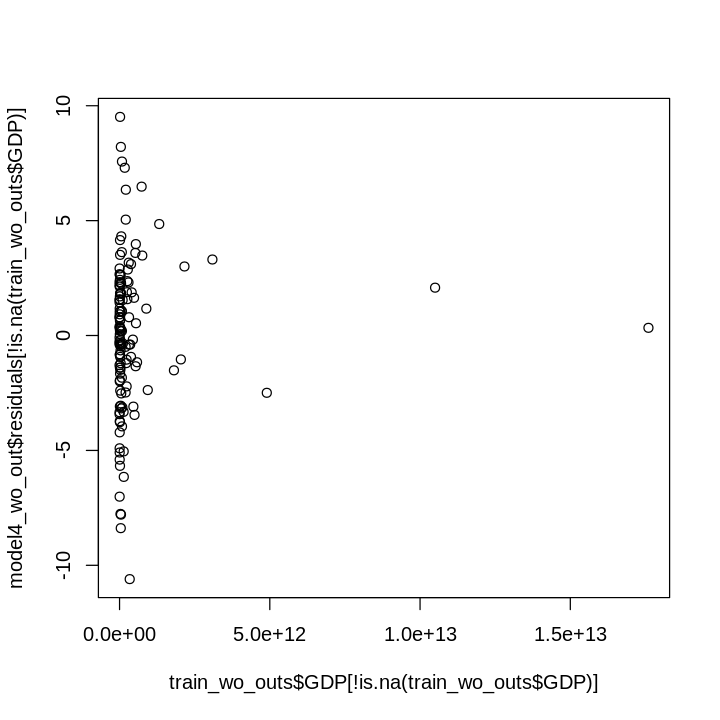

In [141]:
options(repr.plot.width = 6, repr.plot.height = 6)

mean(resid(model4_wo_out))
plot(fitted(model4_wo_out), resid(model4_wo_out))
plot(fitted(model4_wo_out), rstandard(model4_wo_out))
plot(cooks.distance(model4_wo_out))
qqnorm(resid(model4_wo_out))
qqline(resid(model4_wo_out))
hist(resid(model4_wo_out),breaks=20)

plot(train_wo_outs$BMI[!is.na(train_wo_outs$BMI)], model4_wo_out$residuals[!is.na(train_wo_outs$BMI)])
#plot(train_wo_outs$Status[!is.na(train_wo_outs$Status)], model4_wo_out$residuals[!is.na(train_wo_outs$Status)])
plot(train_wo_outs$Adult.Mortality[!is.na(train_wo_outs$Adult.Mortality)], model4_wo_out$residuals[!is.na(train_wo_outs$Adult.Mortality)])
plot(train_wo_outs$Alcohol[!is.na(train_wo_outs$Alcohol)], model4_wo_out$residuals[!is.na(train_wo_outs$Alcohol)])
plot(train_wo_outs$HepB[!is.na(train_wo_outs$HepB)], model4_wo_out$residuals[!is.na(train_wo_outs$HepB)])
plot(train_wo_outs$BMI[!is.na(train_wo_outs$BMI)], model4_wo_out$residuals[!is.na(train_wo_outs$BMI)])
plot(train_wo_outs$under.five.deaths[!is.na(train_wo_outs$under.five.deaths)], model4_wo_out$residuals[!is.na(train_wo_outs$under.five.deaths)])
plot(train_wo_outs$Polio[!is.na(train_wo_outs$Polio)], model4_wo_out$residuals[!is.na(train_wo_outs$Polio)])
plot(train_wo_outs$Total.expenditure[!is.na(train_wo_outs$Total.expenditure)], model4_wo_out$residuals[!is.na(train_wo_outs$Total.expenditure)])
plot(train_wo_outs$Diphtheria[!is.na(train_wo_outs$Diphtheria)], model4_wo_out$residuals[!is.na(train_wo_outs$Diphtheria)])
plot(train_wo_outs$HIV.AIDS[!is.na(train_wo_outs$HIV.AIDS)], model4_wo_out$residuals[!is.na(train_wo_outs$HIV.AIDS)])
plot(train_wo_outs$thinness.5.9.years[!is.na(train_wo_outs$thinness.5.9.years)], model4_wo_out$residuals[!is.na(train_wo_outs$thinness.5.9.years)])
plot(train_wo_outs$Schooling[!is.na(train_wo_outs$Schooling)], model4_wo_out$residuals[!is.na(train_wo_outs$Schooling)])
plot(train_wo_outs$Population[!is.na(train_wo_outs$Population)], model4_wo_out$residuals[!is.na(train_wo_outs$Population)])
plot(train_wo_outs$GDP[!is.na(train_wo_outs$GDP)], model4_wo_out$residuals[!is.na(train_wo_outs$GDP)])

In [24]:
model4_noc = lm(Life.expectancy ~ . - Infant.Deaths - percentage.expenditure - 
            Income.composition.of.resources - Measles , data = subset(train, select = -c(Country)))
summary(model4_noc)


Call:
lm(formula = Life.expectancy ~ . - Infant.Deaths - percentage.expenditure - 
    Income.composition.of.resources - Measles, data = subset(train, 
    select = -c(Country)))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1190  -2.1100   0.1679   1.9785   9.8428 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.980e+01  3.489e+00  17.138  < 2e-16 ***
StatusDeveloping   -9.186e-01  1.088e+00  -0.844 0.400188    
Adult.Mortality    -2.579e-02  4.921e-03  -5.240 6.30e-07 ***
Alcohol             6.679e-02  1.010e-01   0.661 0.509744    
HepB               -3.211e-02  2.561e-02  -1.253 0.212288    
BMI                 1.559e-02  1.825e-02   0.855 0.394370    
under.five.deaths  -3.582e-03  4.422e-03  -0.810 0.419418    
Polio              -1.506e-02  2.348e-02  -0.641 0.522379    
Total.expenditure   1.947e-01  1.108e-01   1.757 0.081309 .  
Diphtheria          5.318e-02  3.381e-02   1.573 0.118154    
HIV.AIDS           

In [25]:
test2 = subset(test, select = -c(Country, Life.expectancy))

[1] 3.826571

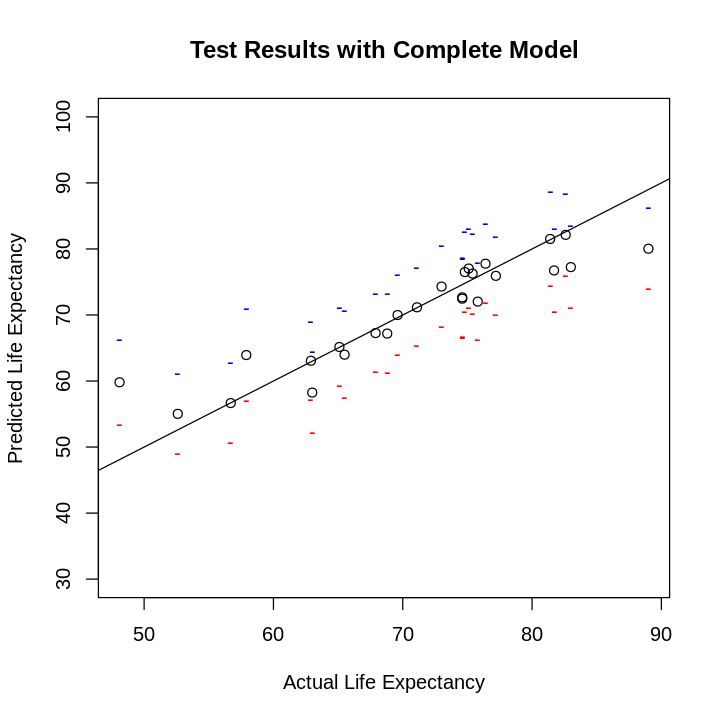

[1] 3.55113

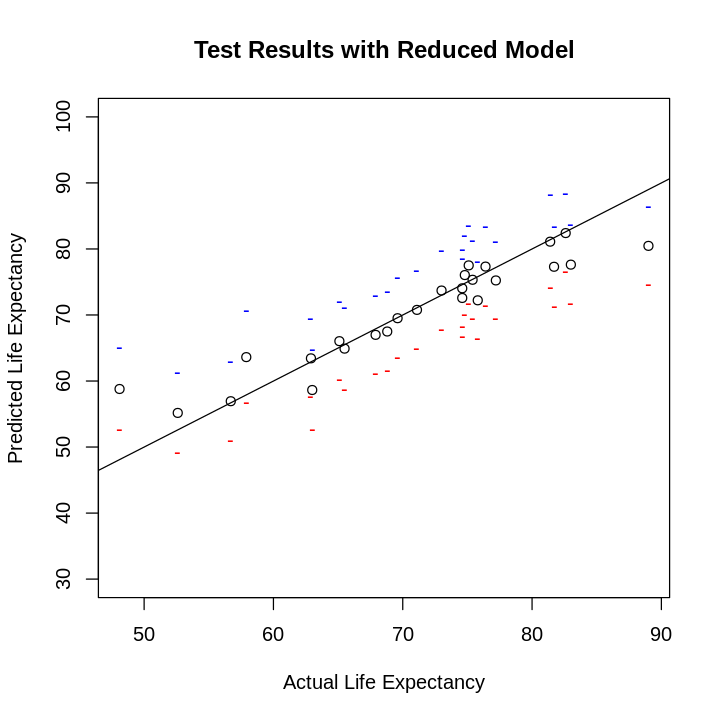

In [26]:
pred1 = predict(model4_noc, newdata = test, interval="prediction", level=0.90)
plot(test$Life.expectancy[!is.na(pred1[,1])], pred1[,1][!is.na(pred1[,1])], ylim = c(30, 100), xlab = 'Actual Life Expectancy', ylab = 'Predicted Life Expectancy')
title('Test Results with Complete Model')
abline(0, 1)
points(test$Life.expectancy[!is.na(pred1[,1])], pred1[ ,2][!is.na(pred1[,1])], col = 'red', pch = '-')
points(test$Life.expectancy[!is.na(pred1[,1])], pred1[ ,3][!is.na(pred1[,1])], col = 'blue', pch = '-')
RMSE1 = sqrt(mean((pred1[,1] - test$Life.expectancy)^2, na.rm = TRUE))
RMSE1

model5_noc = lm(Life.expectancy ~ . - Infant.Deaths - percentage.expenditure - Income.composition.of.resources - Measles - 
            - GDP - BMI - Polio - under.five.deaths - Population - Total.expenditure - Alcohol, 
                data = subset(train, select = -c(Country)))


pred2 = predict(model5_noc, newdata = test, interval="prediction", level=0.90)
plot(test$Life.expectancy[!is.na(pred2[,1])], pred2[,1][!is.na(pred2[,1])], ylim = c(30, 100), xlab = 'Actual Life Expectancy', ylab = 'Predicted Life Expectancy')
title('Test Results with Reduced Model')
abline(0, 1)
points(test$Life.expectancy[!is.na(pred2[,1])], pred2[ ,2][!is.na(pred2[,1])], col = 'red', pch = '-')
points(test$Life.expectancy[!is.na(pred2[,1])], pred2[ ,3][!is.na(pred2[,1])], col = 'blue', pch = '-')
RMSE2 = sqrt(mean((pred2[,1] - test$Life.expectancy)^2, na.rm = TRUE))
RMSE2

In [27]:
summary(model5_noc)


Call:
lm(formula = Life.expectancy ~ . - Infant.Deaths - percentage.expenditure - 
    Income.composition.of.resources - Measles - -GDP - BMI - 
    Polio - under.five.deaths - Population - Total.expenditure - 
    Alcohol, data = subset(train, select = -c(Country)))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3624  -2.2009   0.1513   2.2348   9.0169 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.051e+01  3.300e+00  18.336  < 2e-16 ***
StatusDeveloping   -1.137e+00  9.911e-01  -1.147   0.2533    
Adult.Mortality    -2.522e-02  4.779e-03  -5.276 5.07e-07 ***
HepB               -3.605e-02  2.504e-02  -1.440   0.1522    
Diphtheria          4.977e-02  2.662e-02   1.870   0.0637 .  
HIV.AIDS           -1.165e+00  2.879e-01  -4.045 8.72e-05 ***
thinness.5.9.years -1.408e-01  7.876e-02  -1.787   0.0761 .  
Schooling           1.231e+00  1.685e-01   7.303 2.14e-11 ***
GDP                 3.754e-13  2.816e-13   1.333   0.1

In [28]:
fin_data = subset(train, select = -c(Infant.Deaths,percentage.expenditure, Income.composition.of.resources, Measles,
            GDP, BMI, Polio, under.five.deaths,Population,Total.expenditure, Alcohol))
colnames(fin_data)

[1] "Country"            "Status"             "Life.expectancy"   
[4] "Adult.Mortality"    "HepB"               "Diphtheria"        
[7] "HIV.AIDS"           "thinness.5.9.years" "Schooling"

[1] 5.41129e-17

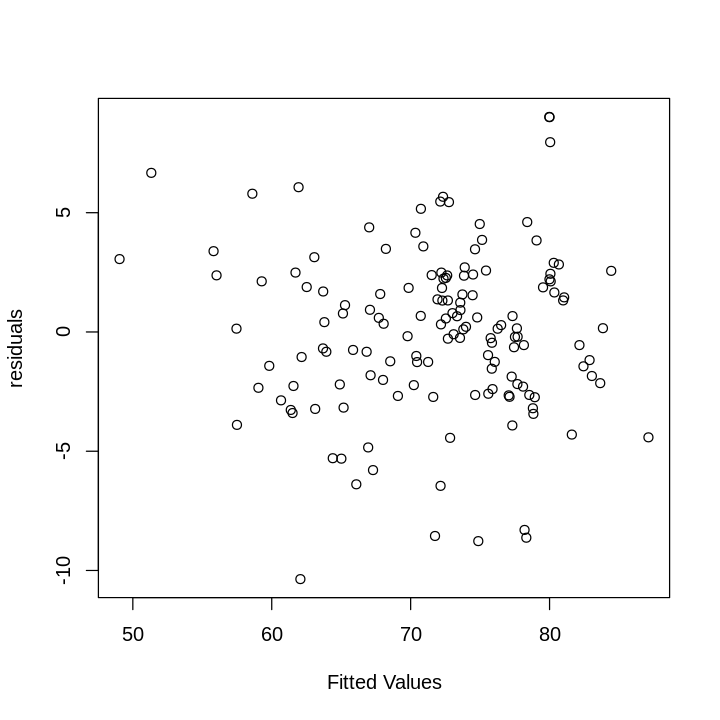

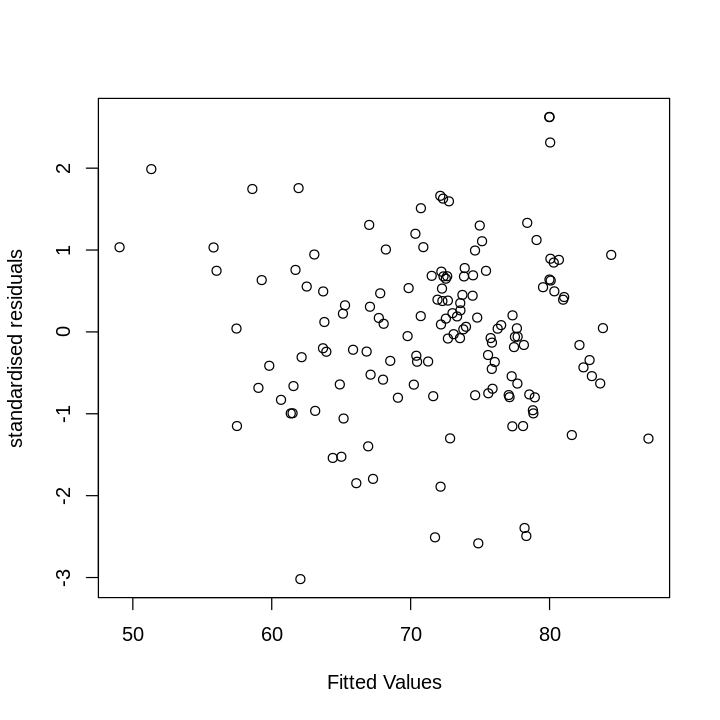

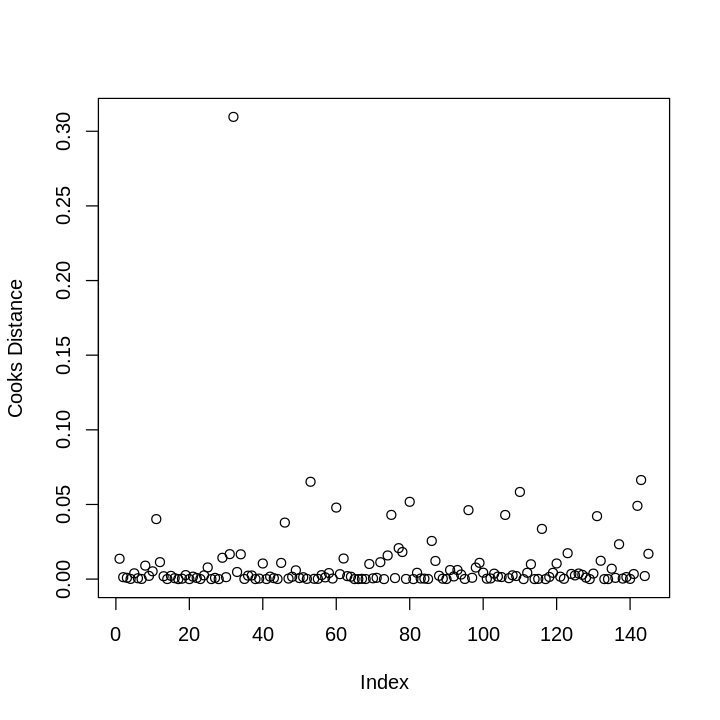

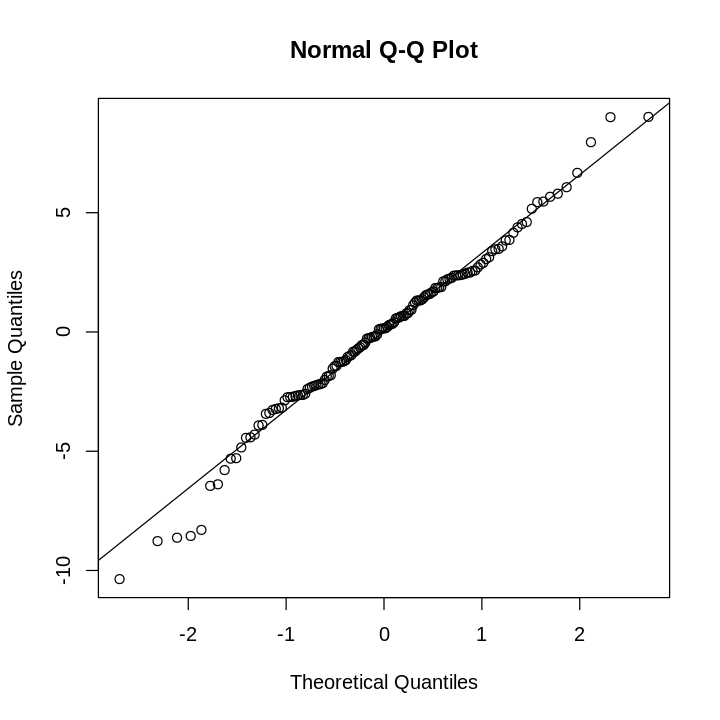

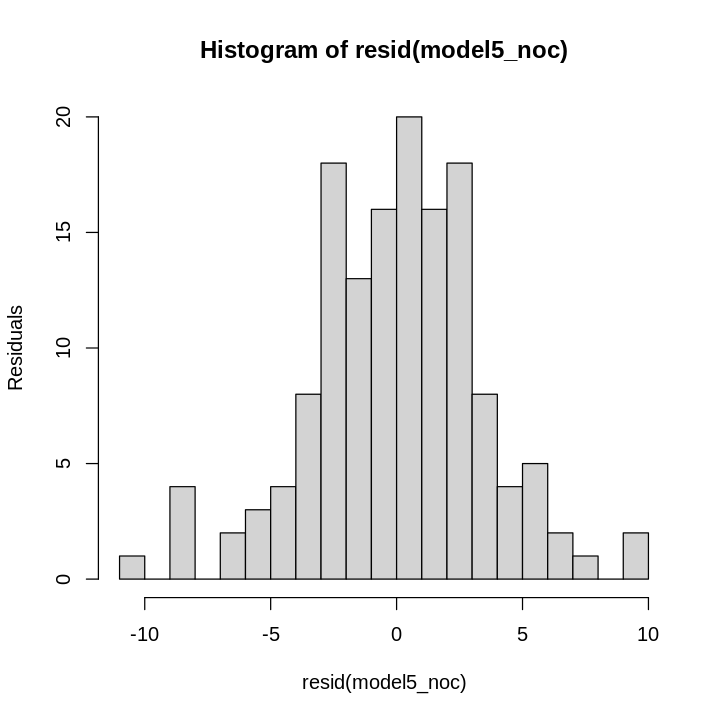

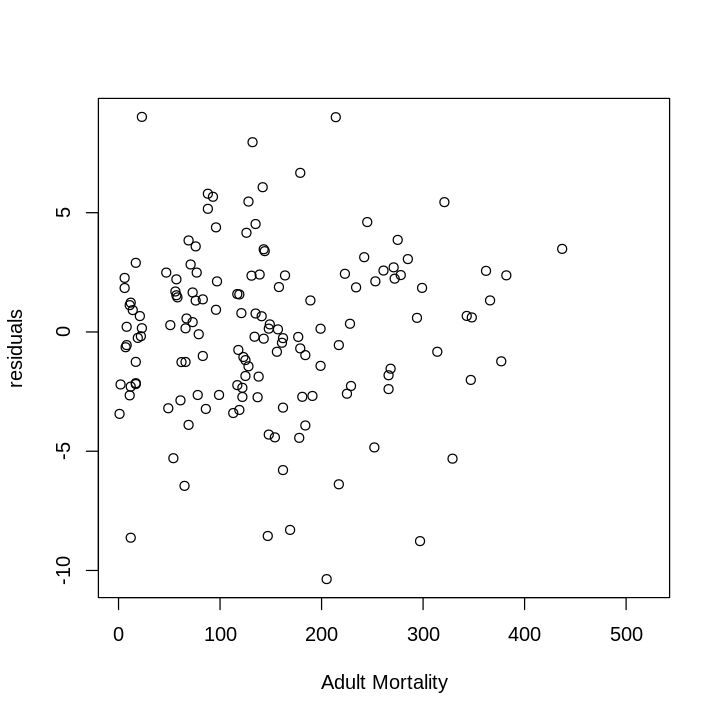

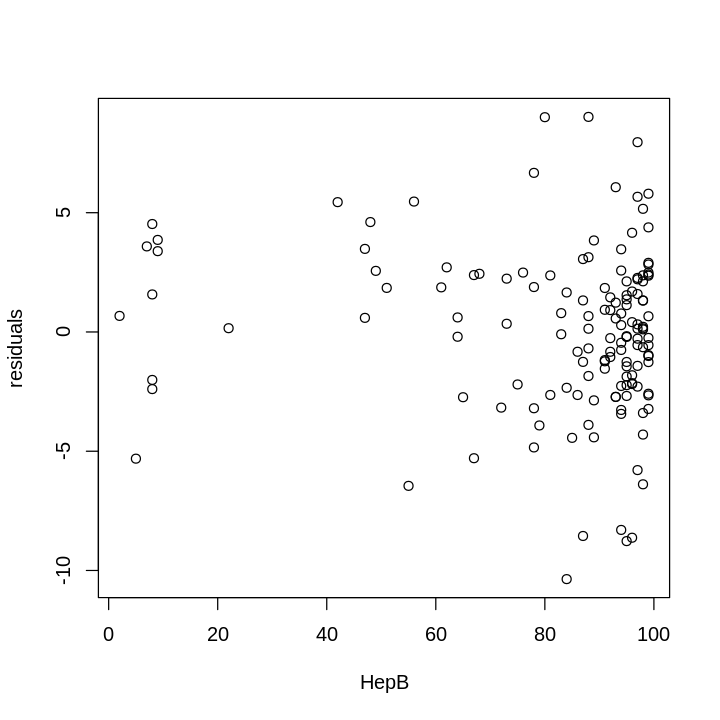

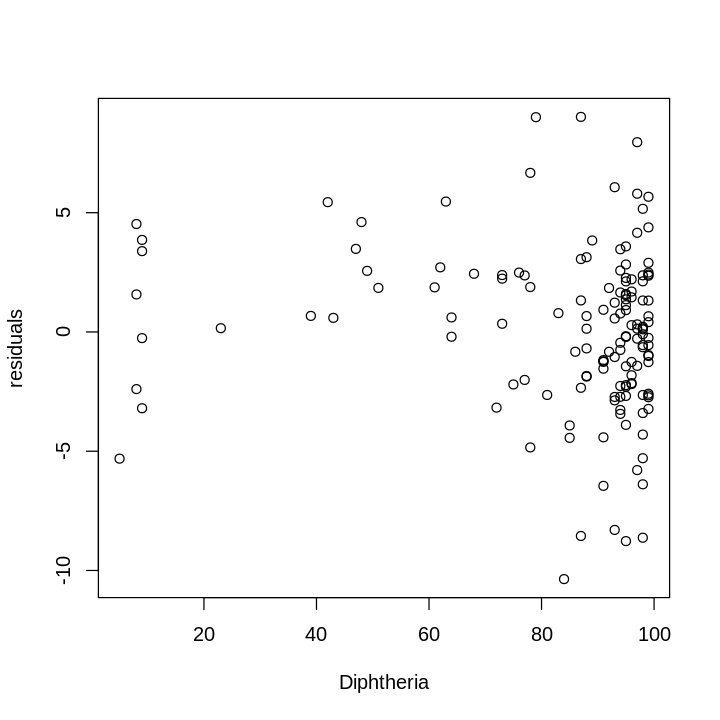

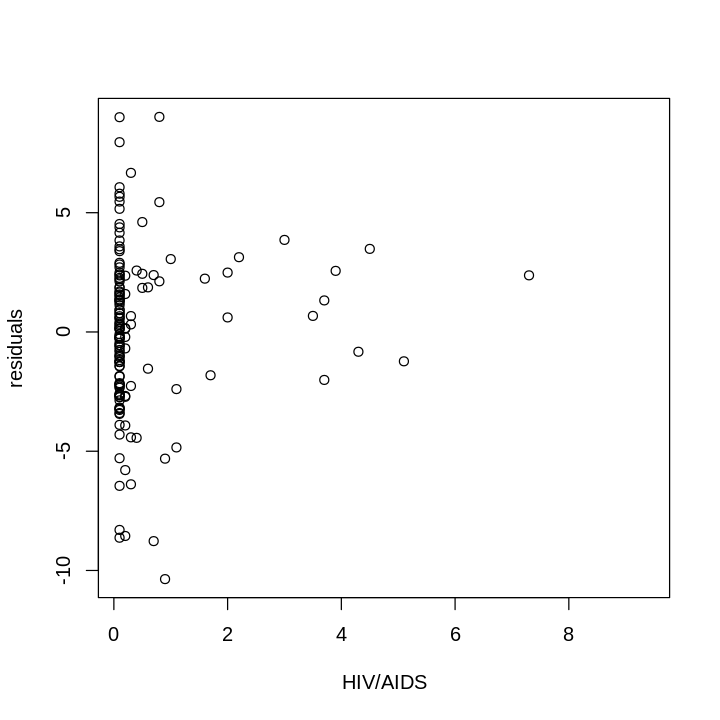

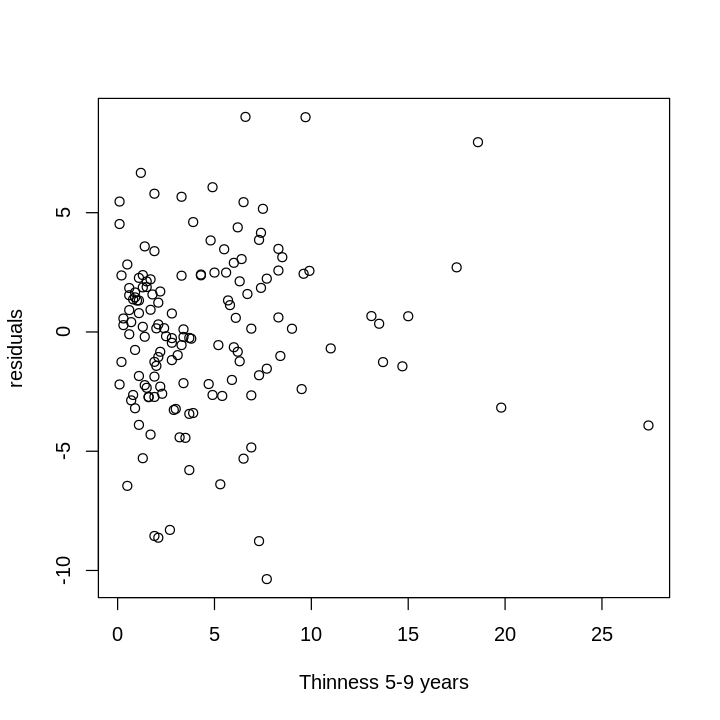

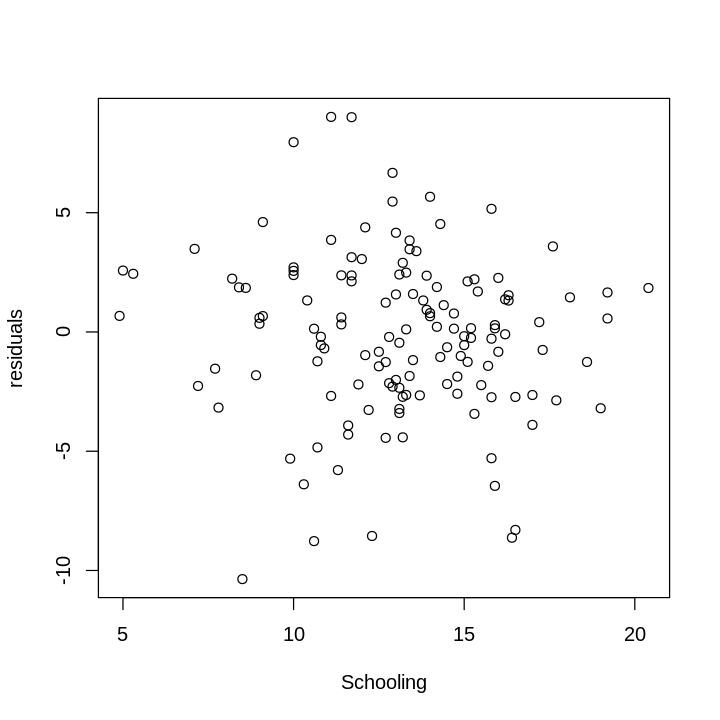

In [30]:
options(repr.plot.width = 6, repr.plot.height = 6)

mean(resid(model5_noc))
plot(fitted(model5_noc), resid(model5_noc), xlab = 'Fitted Values', ylab = 'residuals')
plot(fitted(model5_noc), rstandard(model5_noc), xlab = 'Fitted Values', ylab = 'standardised residuals')
plot(cooks.distance(model5_noc), ylab = 'Cooks Distance')
qqnorm(resid(model5_noc))
qqline(resid(model5_noc))
hist(resid(model5_noc),breaks=20, ylab = 'Residuals')

#plot(subset(train, select = -c(Country))$Status[!is.na(subset(train, select = -c(Country))$Status)], model5_noc$residuals[!is.na(subset(train, select = -c(Country))$Status)], xlab = 'Status', ylab = 'residuals')
plot(subset(train, select = -c(Country))$Adult.Mortality[!is.na(subset(train, select = -c(Country))$Adult.Mortality)], model5_noc$residuals[!is.na(subset(train, select = -c(Country))$Adult.Mortality)], xlab = 'Adult Mortality', ylab = 'residuals')
plot(subset(train, select = -c(Country))$HepB[!is.na(subset(train, select = -c(Country))$HepB)], model5_noc$residuals[!is.na(subset(train, select = -c(Country))$HepB)], , xlab = 'HepB', ylab = 'residuals')
plot(subset(train, select = -c(Country))$Diphtheria[!is.na(subset(train, select = -c(Country))$Diphtheria)], model5_noc$residuals[!is.na(subset(train, select = -c(Country))$Diphtheria)], xlab = 'Diphtheria', ylab = 'residuals')
plot(subset(train, select = -c(Country))$HIV.AIDS[!is.na(subset(train, select = -c(Country))$HIV.AIDS)], model5_noc$residuals[!is.na(subset(train, select = -c(Country))$HIV.AIDS)], xlab = 'HIV/AIDS', ylab = 'residuals')
plot(subset(train, select = -c(Country))$thinness.5.9.years[!is.na(subset(train, select = -c(Country))$thinness.5.9.years)], model5_noc$residuals[!is.na(subset(train, select = -c(Country))$thinness.5.9.years)], xlab = 'Thinness 5-9 years', ylab = 'residuals')
plot(subset(train, select = -c(Country))$Schooling[!is.na(subset(train, select = -c(Country))$Schooling)], model5_noc$residuals[!is.na(subset(train, select = -c(Country))$Schooling)], xlab = 'Schooling', ylab = 'residuals')


In [32]:
train[cooks.distance(model5_noc)>4/nrow(train),]

,Country,Status,Life.expectancy,Adult.Mortality,Infant.Deaths,Alcohol,percentage.expenditure,HepB,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,thinness.5.9.years,Income.composition.of.resources,Schooling,Population,GDP
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
12,Czechia,Developed,78.6,88,0,12.68,0.000000,99,222,65.6,0,99,7.41,97,0.1,1.9,NA,NA,10525347,209000000000
36,The former Yugoslav republic of Macedonia,Developing,75.5,12,0,1.13,0.000000,97,116,59.7,0,96,6.48,95,0.1,2.2,0.743,12.9,2067471,11362272838
52,Philippines,Developing,68.4,214,54,6.70,31.272322,80,58848,24.8,68,77,7.30,79,0.1,9.7,0.676,11.7,100513137,297000000000
61,Nigeria,Developing,53.6,362,490,0.01,263.211103,49,6855,24.7,759,49,3.67,49,3.9,9.9,0.521,10.0,176404931,547000000000
69,Mauritania,Developing,63.0,205,8,0.01,80.926798,84,14,3.1,8,84,3.77,84,0.9,7.7,0.509,8.5,3930894,6592537782
89,Samoa,Developing,73.8,128,0,0.01,660.277792,56,0,74.3,0,58,7.22,63,0.1,0.1,0.701,12.9,192220,756805950
94,Burundi,Developing,59.1,297,22,0.01,41.251590,95,0,18.2,32,95,7.54,95,0.7,7.3,0.404,10.6,9844301,2705783272
113,Pakistan,Developing,66.2,162,359,0.01,62.293611,72,1370,24.7,442,72,2.61,72,0.1,19.8,0.542,7.8,195305012,244000000000
124,Paraguay,Developing,73.9,147,3,0.01,561.768470,87,0,49.4,3,83,9.81,87,0.2,1.9,0.688,12.3,6599524,40377987209


In [33]:
colnames(test)

[1] "Country"                         "Status"                         
 [3] "Life.expectancy"                 "Adult.Mortality"                
 [5] "Infant.Deaths"                   "Alcohol"                        
 [7] "percentage.expenditure"          "HepB"                           
 [9] "Measles"                         "BMI"                            
[11] "under.five.deaths"               "Polio"                          
[13] "Total.expenditure"               "Diphtheria"                     
[15] "HIV.AIDS"                        "thinness.5.9.years"             
[17] "Income.composition.of.resources" "Schooling"                      
[19] "Population"                      "GDP"

In [34]:
test

,Country,Status,Life.expectancy,Adult.Mortality,Infant.Deaths,Alcohol,percentage.expenditure,HepB,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,thinness.5.9.years,Income.composition.of.resources,Schooling,Population,GDP
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
4,Bahamas,Developing,75.4,16,0,9.45,0.000000,96,0,63.8,0,96,7.74,96,0.1,2.5,0.789,12.6,370625,1.118000e+10
20,Kuwait,Developing,74.6,82,0,0.01,2480.896965,96,55,7.8,1,94,3.40,95,0.1,3.4,0.787,13.0,3690939,1.630000e+11
28,Republic of Korea,Developing,82.0,66,1,0.01,0.000000,99,442,31.2,2,99,7.37,99,0.1,1.0,NA,NA,50750000,1.480000e+12
34,Slovakia,Developed,76.4,113,0,10.60,0.000000,97,0,58.4,0,97,8.50,97,0.1,1.2,0.841,15.1,5418649,1.010000e+11
39,United Republic of Tanzania,Developing,67.0,34,86,0.01,0.000000,97,88,23.2,121,97,5.58,97,1.4,6.6,NA,NA,49960563,4.996479e+10
46,Iraq,Developing,67.9,199,32,0.01,43.524080,62,1317,58.5,39,67,5.54,64,0.1,5.1,0.658,10.1,34411949,2.280000e+11
54,Portugal,Developed,89.0,78,0,9.88,271.254553,98,0,6.9,0,98,9.50,98,0.1,0.5,0.837,16.8,10401062,2.300000e+11
56,Kenya,Developing,62.9,255,56,0.01,170.962662,92,354,21.3,79,93,5.72,92,2.9,7.7,0.546,11.1,46700063,6.828577e+10
64,Bosnia and Herzegovina,Developing,77.2,89,0,4.03,732.866249,89,3000,55.3,0,86,9.57,86,0.1,2.4,0.742,14.2,3482106,1.856086e+10


Seems like we won't need transformations from the residual plot

In [35]:
train2 = subset(train, select = -c(Infant.Deaths,percentage.expenditure,
            Income.composition.of.resources,Measles))

In [36]:
AIC(lm(Life.expectancy ~ . - Country, data = train2))

[1] 792.0195

In [37]:
AIC(lm(Life.expectancy ~ . - Country - Status, data = train2))

[1] 790.812

In [38]:
AIC(lm(Life.expectancy ~ . - Country - Adult.Mortality, data = train2))

[1] 817.8075

In [39]:
AIC(lm(Life.expectancy ~ . - Country - Alcohol, data = train2))

[1] 790.5061

In [40]:
AIC(lm(Life.expectancy ~ . - Country - HepB, data = train2))

[1] 791.7614

In [41]:
AIC(lm(Life.expectancy ~ . - Country - BMI, data = train2))

[1] 790.8317

In [42]:
AIC(lm(Life.expectancy ~ . - Country - under.five.deaths, data = train2))

[1] 790.7495

In [43]:
AIC(lm(Life.expectancy ~ . - Country - Polio, data = train2))

[1] 790.4777

In [44]:
AIC(lm(Life.expectancy ~ . - Country - Total.expenditure, data = train2))

[1] 793.4217

In [45]:
AIC(lm(Life.expectancy ~ . - Country - HIV.AIDS, data = train2))

[1] 805.1804

In [46]:
AIC(lm(Life.expectancy ~ . - Country - thinness.5.9.years, data = train2))

[1] 790.2294

In [47]:
AIC(lm(Life.expectancy ~ . - Country - Schooling, data = train2))

[1] 827.5776

In [48]:
AIC(lm(Life.expectancy ~ . - Country - Population, data = train2))

[1] 790.106

In [49]:
AIC(lm(Life.expectancy ~ . - Country - GDP, data = train2))

[1] 790.4571

Dropping GDP

In [50]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

In [51]:
AIC(lm(Life.expectancy ~ . - Country - GDP, data = train2)) #base

[1] 790.4571

In [52]:
AIC(lm(Life.expectancy ~ . - Country - GDP - Status, data = train2)) 

[1] 789.6395

In [53]:
AIC(lm(Life.expectancy ~ . - Country - Population - Adult.Mortality, data = train2)) 

[1] 815.8734

In [54]:
AIC(lm(Life.expectancy ~ . - Country - Population - Alcohol, data = train2)) 

[1] 788.636

In [55]:
AIC(lm(Life.expectancy ~ . - Country - GDP - HepB, data = train2)) 

[1] 790.2967

In [56]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI, data = train2)) 

[1] 789.2763

In [57]:
AIC(lm(Life.expectancy ~ . - Country - GDP - under.five.deaths, data = train2)) 

[1] 790.2937

In [58]:
AIC(lm(Life.expectancy ~ . - Country - GDP - Polio, data = train2)) 

[1] 788.8597

In [59]:
AIC(lm(Life.expectancy ~ . - Country - GDP - Total.expenditure, data = train2)) 

[1] 791.9051

In [60]:
AIC(lm(Life.expectancy ~ . - Country - GDP - Diphtheria, data = train2)) 

[1] 791.2083

In [61]:
AIC(lm(Life.expectancy ~ . - Country - GDP - HIV.AIDS, data = train2)) 

[1] 803.2387

In [62]:
AIC(lm(Life.expectancy ~ . - Country - GDP - thinness.5.9.years, data = train2)) 

[1] 788.7867

In [63]:
AIC(lm(Life.expectancy ~ . - Country - GDP - Schooling, data = train2)) 

[1] 825.7949

In [64]:
AIC(lm(Life.expectancy ~ . - Country - GDP - Population, data = train2)) 

[1] 790.6911

Dropping BMI

In [65]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI, data = train2))  #base

[1] 789.2763

In [66]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

In [67]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Status, data = train2))

[1] 788.1551

In [68]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Adult.Mortality, data = train2))

[1] 816.122

In [69]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Alcohol, data = train2))

[1] 787.8894

In [70]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - HepB, data = train2))

[1] 789.3269

In [71]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - under.five.deaths, data = train2))

[1] 788.8346

In [72]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio, data = train2))

[1] 787.6635

In [73]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Total.expenditure, data = train2))

[1] 790.5217

In [74]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Diphtheria, data = train2))

[1] 790.262

In [75]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - HIV.AIDS, data = train2))

[1] 802.5939

In [76]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - thinness.5.9.years, data = train2))

[1] 788.2257

In [77]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Schooling, data = train2))

[1] 826.9519

In [78]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Population, data = train2))

[1] 789.2587

Dropping Polio

In [79]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio, data = train2)) #base

[1] 787.6635

In [80]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

In [81]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - Status, data = train2)) 

[1] 786.5161

In [82]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - Adult.Mortality, data = train2)) 

[1] 814.1292

In [83]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - Alcohol, data = train2)) 

[1] 786.3088

In [84]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - HepB, data = train2)) 

[1] 787.5592

In [85]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths, data = train2)) 

[1] 787.1895

In [86]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - Total.expenditure, data = train2)) 

[1] 788.7208

In [87]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - Diphtheria, data = train2)) 

[1] 788.531

In [88]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - HIV.AIDS, data = train2)) 

[1] 800.5982

In [89]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - thinness.5.9.years, data = train2)) 

[1] 786.691

In [90]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - Schooling, data = train2)) 

[1] 825.4072

In [91]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - Population, data = train2)) 

[1] 787.7025

Dropping under.five.deaths

In [92]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths, data = train2)) #base

[1] 787.1895

In [93]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

In [94]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Status, data = train2)) 

[1] 785.8978

In [95]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Adult.Mortality, data = train2)) 

[1] 813.7308

In [96]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Alcohol, data = train2)) 

[1] 785.7732

In [97]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - HepB, data = train2)) 

[1] 786.9053

In [98]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Total.expenditure, data = train2)) 

[1] 788.3374

In [99]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Diphtheria, data = train2)) 

[1] 788.2738

In [100]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - HIV.AIDS, data = train2)) 

[1] 800.6944

In [101]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - thinness.5.9.years, data = train2)) 

[1] 787.9779

In [102]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Schooling, data = train2)) 

[1] 824.2921

In [103]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population, data = train2)) 

[1] 785.8471

Dropping Population

In [104]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population, data = train2)) 

[1] 785.8471

In [105]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

In [106]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - Status, data = train2)) 

[1] 784.494

In [107]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - Adult.Mortality, data = train2)) 

[1] 812.7008

In [108]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - Alcohol, data = train2)) 

[1] 784.5919

In [109]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - Total.expenditure, data = train2)) 

[1] 786.8654

In [110]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - Diphtheria, data = train2)) 

[1] 786.9386

In [111]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - HIV.AIDS, data = train2)) 

[1] 799.319

In [112]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - thinness.5.9.years, data = train2)) 

[1] 786.0386

In [113]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - Schooling, data = train2)) 

[1] 823.2109

In [114]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - HepB, data = train2)) 

[1] 785.6033

Dropping Total.expenditure

In [115]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population - Total.expenditure, data = train2))  #base

[1] 786.8654

In [116]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

In [117]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Status, data = train2)) 

[1] 785.6905

In [118]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Adult.Mortality, data = train2)) 

[1] 814.0355

In [119]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol, data = train2)) 

[1] 786.4114

In [120]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - HepB, data = train2)) 

[1] 786.6345

In [121]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Diphtheria, data = train2)) 

[1] 788.0628

In [122]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - HIV.AIDS, data = train2)) 

[1] 799.3548

In [123]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - thinness.5.9.years, data = train2)) 

[1] 787.5544

In [124]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Schooling, data = train2)) 

[1] 823.3408

Dropping Alcohol

In [125]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol, data = train2)) #base

[1] 786.4114

In [126]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

In [127]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol - Status, data = train2)) 

[1] 786.1575

In [128]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol - Adult.Mortality, data = train2)) 

[1] 812.0529

In [129]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol - HepB, data = train2)) 

[1] 786.7598

In [130]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol - Diphtheria, data = train2)) 

[1] 788.407

In [131]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol - HIV.AIDS, data = train2)) 

[1] 800.5386

In [132]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol - thinness.5.9.years, data = train2)) 

[1] 787.6321

In [133]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol - Schooling, data = train2)) 

[1] 832.4423

In [134]:
AIC(lm(Life.expectancy ~ . - Country - GDP - BMI - Polio - under.five.deaths - Population 
       - Total.expenditure - Alcohol, data = train2)) #base

[1] 786.4114

In [135]:
colnames(train2)

[1] "Country"            "Status"             "Life.expectancy"   
 [4] "Adult.Mortality"    "Alcohol"            "HepB"              
 [7] "BMI"                "under.five.deaths"  "Polio"             
[10] "Total.expenditure"  "Diphtheria"         "HIV.AIDS"          
[13] "thinness.5.9.years" "Schooling"          "Population"        
[16] "GDP"

Remaining Predictors: Status, Adult.Mortality, HepB, Diphteria, HIV.AIDS, thinness.5.9.years, Schooling